In [1]:
# -*- coding: utf-8 -*-

In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from html_table_parser import parser_functions as parse
from time import sleep
import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import random
import matplotlib.pyplot as plt
import math
% matplotlib inline

In [3]:
import lxml
import requests
import html5lib
pd.options.display.max_rows = 50

In [4]:
from bokeh.models import HoverTool, CategoricalColorMapper, OpenURL, TapTool, ResetTool
from bokeh.plotting import ColumnDataSource, figure, output_file, show, save, output_notebook
from bokeh.io import curdoc
from bokeh.models.glyphs import VBar

In [ ]:
table_pages = ['https://en.wikipedia.org/wiki/List_of_battles_before_301',
               'https://en.wikipedia.org/wiki/List_of_battles_301%E2%80%931300',
               'https://en.wikipedia.org/wiki/List_of_battles_1301%E2%80%931600',
               'https://en.wikipedia.org/wiki/List_of_battles_since_2001']

In [ ]:
list_pages = ['https://en.wikipedia.org/wiki/List_of_battles_1601%E2%80%931800',
               'https://en.wikipedia.org/wiki/List_of_battles_1801%E2%80%931900',
               'https://en.wikipedia.org/wiki/List_of_battles_1901%E2%80%932000',]

In [ ]:
def list_battles(url):
    req = requests.get(url)
    print req.status_code
    era = req.content
    era_soup = BeautifulSoup(era)
    bullets = era_soup.find_all('li')
    
    for bullet in bullets:
        print bullet
        if 'title' in str(bullet):
#             if 'expedition' or 'recapture' or 'capture' or 'war' or 'action' or 'battle' or 'siege' or 'operation' or 'fall' in str(bullet).lower():
#                 if 'List+of+battles' not in str(bullet):
                    if 'footer' not in str(bullet):
                        link = bullet.a['href']
                        link_list.append(link)

                        title = bullet.a['title']
                        title_list.append(title)
                    else:
                        print 'NEXT ENTRY: ' + str(bullet)
#                 else:
#                     print 'NEXT ENTRY: ' + str(bullet)
#             else:
#                 print 'NEXT ENTRY: ' + str(bullet)
        else: 
            print 'NEXT ENTRY' + str(bullet)
                    

In [ ]:
title_list = []
link_list = []
for url in list_pages:
    list_battles(url)

In [ ]:
link_list

In [ ]:
df_late_battles = pd.concat([pd.Series(link_list), pd.Series(title_list)], axis = 1).drop_duplicates()

In [ ]:
df_late_battles = df_late_battles.rename(columns = {0:'url', 1:'Battle'})

In [ ]:
df_late_battles

In [ ]:
df_late_battles[~df_late_battles['Battle'].str.contains('Battle' or 'Operation')]

In [ ]:
df_late_battles.to_csv('battle_list_1600-', encoding = 'utf-8')

In [ ]:
df_late_battles = pd.read_csv('battle_list_1600-.csv', encoding = 'utf-8')

In [ ]:
df_late_battles.head()

In [ ]:
df_late_battles = df_late_battles.drop(['Column1', 'Column4'], axis = 1)
df_late_battles.columns = df_late_battles.iloc[0]
df_late_battles = df_late_battles.drop(0)

In [ ]:
battle_list = []
link_list = []

In [ ]:
def early_battles(link):
    req = requests.get(link)
    print req.status_code
    era = req.content
    era_soup = BeautifulSoup(era)
    tables = era_soup.find_all('table', {'class': 'wikitable'})

    for table in tables:
        cells = table.find_all('td')
        for cell in cells:
            if cell.a is not None:
                a = ['Fall', 'Battle', 'Siege', 'Capture', 'Operation', 'Action', 'Recapture']
                if any(x in str(cell.a['href']) for x in a):
                    battle_list.append(cell.a['title'])
                    link_list.append(cell.a['href'])

In [ ]:
for page in table_pages:
    print page
    early_battles(page)

In [ ]:
df_battles = pd.DataFrame({'battle': battle_list,
                          'link':link_list})

In [ ]:
df_battles = df_battles.rename(columns = {'link':'url', 'battle':'Battle'})

In [ ]:
len(df_battles)

In [ ]:
len(df_late_battles)

In [ ]:
df_battles.head()

In [ ]:
df_url = pd.concat([df_late_battles, df_battles]).reset_index(drop = True)

In [ ]:
len(df_url)

In [ ]:
len(df_url.drop_duplicates())

In [ ]:
s_req = requests.get('https://en.wikipedia.org/Alexander_the_Great')

soup = BeautifulSoup(s_req.text)

ul = soup.find('ul', {'class':'redirectText'})

In [ ]:
if ul is not None:
    print 'works'

In [ ]:
df_battle_all = pd.DataFrame()
df_battle = pd.DataFrame()
def table_scrape(url, name):
#     sleep(1)
    print name
    link = 'https://en.wikipedia.org' + url
    b_req = requests.get(link)

    soup = BeautifulSoup(b_req.text)
    
    bell = soup.find('table', {'class':'infobox vevent'})
    
    if bell is not None:

        details = pd.DataFrame(parse.make2d(bell))
    else:
        return b_req
    

    if 'Belligerents' in str(bell):
    
        clean_rows = details.drop_duplicates(0).set_index(0,drop = True).loc[['Date', 'Location', 'Result'],:]

        clean_col = clean_rows.transpose().reset_index(drop = True)

        df_x_bells = pd.DataFrame()

        html_table = bell.find_all('tr')
        bell_list = []
        bell_y_list = []

        for index, cell in zip(range(0, len(html_table)), html_table):
            if 'Commanders and leaders' in str(cell):
                leaders = html_table[index + 1]
                cells = leaders.find_all('td')
                count = 0
                for cell in cells:
                    count += 1
                    anchors = cell.find_all('a')
                    for anchor in anchors:
                        if 'title' in str(anchor):
                            if 'class="image"' in str(anchor):
                                cl = 'image'
                            elif 'class="thumbborder"' in str(anchor):
                                cl = 'thumb'
                            elif 'cite_note' in str(anchor):
                                cl = 'cite'
                            elif 'disambiguation needed' in str(anchor):
                                cl = 'disam'
                            elif 'cnote_g' in str(anchor):
                                cl = 'cnote'
                            else:
                                title = anchor['title']
                                if any(title == x for x in ['Napoleon I','Alexander III of Macedon']):
                                    print 'napoleon or alex redirect'

                                ref = anchor['href']
                                link = 'https://en.wikipedia.org' + ref

                                if len(ref) <= 10:
                                    t_req = requests.get(link)
                                elif any(ref[8] + ref[9] + ref[10] == x for x in ['pt.', 'tr.', 'ko.', 'ja.', 'th.','da.', 'es.', 'de.', 'it.', 'fr.', 'zh.']):
                                    print 'Not English!'
                                    link = ref
                                    t_req = requests.get(link)
                                elif soup.find('ul', {'class':'redirectText'}) is not None:
                                    print 'REDIRECT'
                                    print title
                                    ul = soup.find('ul', {'class':'redirectText'})
                                    a = ul.a
                                    redirect = a['href']
                                    link = 'https://en.wikipedia.org' + redirect
                                    t_req = requests.get(link)
                                else:
                                    t_req = requests.get(link)

                                t_soup = BeautifulSoup(t_req.text)

                                c_name = t_soup.find('title')
                                c_name = str(c_name)

                                if c_name:
                                    c_name = c_name.replace(' - Wikipedia', '').replace('<title>', '').replace('</title>', '')
                                else:
                                    if count == 1:
                                        bell_list.append(title)
                                    elif count == 2:
                                        bell_y_list.append(title)
                                if 'ex.php?title=' in ref:
                                    ref = ref.replace('ex.php?title=', '')
                                    ref = ref.replace('&action=edit&redlink=1', '')

                                omit_list = ['Capital punishment', 
                                             'Military advisor', 
                                             'Wounded in action', 
                                             'Prisoner of war', 
                                             'Killed in action', 
                                             'Surrender (military)', 
                                             'Surrendered',
                                             'Common military ranks in English']

                                if all(c_name != x for x in omit_list):


                                    if count == 1:

                                        bell_list.append(c_name)
                                    elif count == 2:
                                        bell_y_list.append(c_name)



        for bell in bell_list:
            clean_col['belligerent'] = bell
            df_x_bells = pd.concat([df_x_bells, clean_col])
            df_x_bells = df_x_bells.reset_index(drop = True)


        df_y_bells = pd.DataFrame()
        for bell in bell_y_list:
            clean_col['belligerent'] = bell
            df_y_bells = pd.concat([df_y_bells, clean_col])
            df_y_bells = df_y_bells.reset_index(drop = True)

        df_y_bells = df_y_bells.rename(columns = {0:'Location'})

        if 'Strength' in str(details[0]):
            strength_finder = details[details[0] == 'Strength']


            strength_row = strength_finder.index + 1

            strength = details.loc[strength_row]

            strength_x = strength.iloc[0,0]

            strength_y = strength.iloc[0,1]
        else:
            strength_x = 'unknown'
            strength_y = 'unknown'

        df_x_bells['own'] = strength_x

        df_x_bells['opp'] = strength_y

        df_y_bells['own'] = strength_y

        df_y_bells['opp'] = strength_x

        if 'Casualties and losses' not in str(details[0]):
            df_x_bells['taken'] = np.NaN
            df_x_bells['inflicted'] = np.NaN
            df_y_bells['taken'] = np.NaN
            df_y_bells['inflicted'] = np.NaN

        else:

            casualties_finder = details[details[0] == 'Casualties and losses']

            casualties_row = casualties_finder.index + 1

            casualties = details.loc[casualties_row]

            casualties_x = casualties.iloc[0,0]

            casualties_y = casualties.iloc[0,1]

            df_x_bells['taken'] = casualties_x

            df_x_bells['inflicted'] = casualties_y

            df_y_bells['taken'] = casualties_y

            df_y_bells['inflicted'] = casualties_x



        df_x_bells['Battle'] = name

        df_y_bells['Battle'] = name

        df_x_bells['pos'] = 'L'

        df_y_bells['pos'] = 'R'

        df_battle = pd.concat([df_x_bells, df_y_bells]).reset_index(drop = True)

        df_battle_all = pd.concat([df_battle_all, df_battle]).reset_index(drop = True).drop_duplicates()

        global df_battle_all
    else:
        print 'Filtered: ' + name

In [ ]:
count = 0
for num, rows in {1:df_url[:200],
             2:df_url[200:400], 
             3:df_url[400:600], 
             4:df_url[600:800],
             5:df_url[800:1000],
             6:df_url[1000:1200],
             7:df_url[1200:1400],
             8:df_url[1400:1600],
             9:df_url[1600:1800],
             10:df_url[1800:2000],
             11:df_url[2000:2200],
             12:df_url[2200:2400],
             13:df_url[2400:2600],
             14:df_url[2600:2800],
             15:df_url[2800:3000],
             16:df_url[3000:3200],
             17:df_url[3200:3400],
             18:df_url[3400:]}.iteritems():
    df_battle = pd.DataFrame()
    df_batch = rows
    for index, row in df_batch.iterrows():
        count += 1
        global count
        print str(count) + '/' + str(len(df_url))
        table_scrape(row['url'], row['Battle'])
    df_battle_all.to_csv('rows_{}.csv'.format(num), encoding = 'utf-8')
    print 'NEW FRAME' + str(num)

In [ ]:
row_list = ['rows_1.csv',
 'rows_2.csv',
 'rows_3.csv',
 'rows_4.csv',
 'rows_5.csv',
 'rows_6.csv',
 'rows_7.csv',
 'rows_8.csv',
 'rows_9.csv',
 'rows_10.csv',
 'rows_11.csv',
 'rows_12.csv',
 'rows_13.csv',
 'rows_14.csv',
 'rows_15.csv',
 'rows_16.csv',
 'rows_17.csv',
 'rows_18.csv']

In [ ]:
df_comm = pd.DataFrame()
for sheet in row_list:
    df_rows = pd.read_csv(sheet)
    df_comm = pd.concat([df_comm, df_rows]).reset_index(drop = True)

In [ ]:
df_comm = df_comm.drop('Unnamed: 0', axis = 1)

In [ ]:
len(df_comm)

In [ ]:
len(df_comm)

In [ ]:
df_comm.to_csv('battles_dirty.csv', encoding = 'utf-8')

In [ ]:
df_comm = pd.read_csv('battles_dirty.csv').drop('Unnamed: 0', axis = 1)

In [ ]:
df_comm = df_comm.drop_duplicates()

In [ ]:
df_comm.head()

In [ ]:
len(df_comm)

In [ ]:
df_comm[df_comm.belligerent.str.contains('Nasser')]

In [ ]:
len(df_comm.drop_duplicates())

In [ ]:
df_comm = df_comm.drop_duplicates().reset_index(drop = True)

In [ ]:
df_comm.to_csv('battles_deduped.csv')

In [ ]:
len(df_comm[df_comm.belligerent.str.contains('Napoleon')])

In [ ]:
df_comm[df_comm.belligerent.str.contains('Scipio')]

In [ ]:
df_results = pd.read_csv('result_column.csv')

In [ ]:
df_results[df_results.Battle == 'Battle_of_Camarón']

In [ ]:
df_comm.head()

In [ ]:
df_results.head()

In [ ]:
df_more_results = pd.merge(df_comm, df_results, how = 'outer', on = ['Battle', 'belligerent', 'pos', 'Result'])

In [ ]:
df_more_results = df_more_results[df_more_results.VorD.isnull()]

In [ ]:
df_more_results = df_more_results.drop_duplicates(subset = ['Battle', 'Date', 'VorD'])

In [ ]:
df_more_results.head()

In [ ]:
df_more_results.to_csv('adding_results_10.21.csv', encoding = 'utf-8')

In [ ]:
df_comm[df_comm.Battle == 'Battle_of_Camarón']

In [ ]:
df_comm[df_comm.belligerent == 'Ambroise de Loré']

In [ ]:
df_vl = pd.merge(df_comm, df_results, how = 'outer', on = ['Battle', 'belligerent', 'Result', 'pos'])

In [ ]:
df_vl

In [ ]:
df_vl = df_vl.sort('VorD')

In [ ]:
df_vl[df_vl.belligerent == 'Ambroise de Loré']

In [ ]:
df_vl[df_vl.belligerent == 'Saracens']

In [ ]:
df_vl.to_csv('additional_results.csv')

In [ ]:
df_10_21_fill = df_vl[df_vl.VorD.isnull()]

In [ ]:
df_ar = pd.read_csv('additional_results.csv', encoding = 'utf-8')

In [ ]:
df_strength = df_ar.drop(['Unnamed: 0', 'Location', 'Result', 'inflicted', 'taken', 'opp'], axis = 1)

In [ ]:
df_strength = df_strength.sort('Battle').reset_index(drop = True)

In [ ]:
df_strength_dd = df_strength.drop_duplicates(['own', 'pos'], keep = 'first')

In [ ]:
df_strength_dd.own = df_strength_dd.own.str.replace('\r',' ').str.replace('\n', ' ').replace('\n', ' ')

In [ ]:
df_strength_dd = df_strength_dd.sort('Battle').reset_index(drop = True)

In [ ]:
df_strength_dd

In [ ]:
df_strength_dd.to_csv('strength_entry.csv', encoding = 'utf-8')

In [ ]:
df_strength_new = df_strength.drop_duplicates(['own', 'pos', 'Battle'], keep = 'first')

In [ ]:
df_strength_fill = pd.read_excel('strength_entry.xlsx', encoding = 'utf-8')

In [ ]:
df_battles = pd.read_csv('battles_deduped.csv', encoding = 'utf-8').drop('Unnamed: 0', axis = 1)

In [ ]:
df_battles = df_battles.drop(['taken', 'inflicted'], axis = 1)

In [ ]:
df_strength_fill.Battle = df_strength_fill.Battle.str.replace(u"â€“",u'–')

In [ ]:
df_some_strength = pd.merge(df_battles, df_strength_fill, how = 'outer', on = ['Battle', 'pos']).drop(['own_y', 'belligerent_y', 'Date_y'], axis = 1).rename(columns = {'Date_x':'Date','own_x':'own', 'belligerent_x':'belligerent'})

In [ ]:
df_some_strength[df_some_strength.Battle.str.contains('Battle_of_Jena')]

In [ ]:
df_test = df_some_strength.iloc[:,9:]

In [ ]:
df_str_two = df_some_strength[df_some_strength['Infantry'].isnull() & df_some_strength['Cavalry'].isnull() & df_some_strength['Artillery'].isnull() & df_some_strength['Ships'].isnull() & df_some_strength['Airforce'].isnull() & df_some_strength['Special'].isnull()]

In [ ]:
df_str_two.head()

In [ ]:
df_str_two = df_str_two.drop_duplicates(['Battle', 'Date', 'Location', 'Result', 'pos']).drop('VorD', axis = 1)

In [ ]:
len(df_str_two)

In [ ]:
df_merger = df_strength.drop(['Date', 'belligerent', 'own'], axis = 1)

In [ ]:
df_merger = df_merger.drop_duplicates()

In [ ]:
df_str_two.head()

In [ ]:
df_str_two = pd.merge(df_str_two, df_merger, on = ['Battle', 'pos'], how = 'outer').dropna(subset = ['Date', 'Location', 'Result'])

In [ ]:
df_str_two = df_str_two.dropna(subset = ['VorD'])

In [ ]:
df_str_two.to_csv('strength_entry_two.csv')

In [ ]:
df_str_two

In [ ]:
df_partial = pd.read_excel('PARTIAL_strength_entry_two.xlsx', encoding = 'utf-8')

In [ ]:
df_str_two.head()

In [ ]:
df_str_two = df_str_two.drop(['Infantry', 'Cavalry', 'Artillery', 'Ships', 'Airforce', 'Special'], axis = 1)

In [ ]:
df_partial = df_partial.drop(['Date', 'Location', 'Result', 'belligerent','own', 'Column1'],axis = 1)

In [ ]:
df_partial.columns

In [ ]:
df_str_two.head()

In [ ]:
df_finish = pd.merge(df_str_two, df_partial, on = ['Battle', 'pos', 'VorD'], how = 'outer')

In [ ]:
drop_list = list(df_finish[df_finish['Date'].isnull()].index)

In [ ]:
df_finish = df_finish.drop(drop_list)

In [ ]:
df_finish.to_csv('last_strength_entry.csv', encoding = 'utf-8')

In [ ]:
df_some_strength

In [ ]:
df_some_strength[df_some_strength.Battle.str.contains('Siege of La Rochelle')]

In [ ]:
df_more_strength = pd.read_excel('last_strength_entry.xlsx')

In [ ]:
df_more_strength.head()

In [ ]:
df_some_strength.head()

In [ ]:
df_more_strength = pd.merge(df_more_strength, df_str_two, on = ['Battle', 'pos'], how = 'outer').drop(['own_y', 'Infantry_y', 'Cavalry_y', 'Artillery_y', 'Ships_y', 'Airforce_y', 'Special_y', 'Date_y', 'Location_y', 'Result_y', 'belligerent_y'], axis = 1).dropna(subset = ['Date_x'])

In [ ]:
df_more_strength.columns = df_more_strength.columns.str.replace('_x', '')

In [ ]:
df_more_strength.head()

In [ ]:
df_some_strength.head()

In [ ]:
df_more_strength

In [ ]:
df_fill_two = pd.merge(df_battles, df_more_strength, on = ['Battle', 'pos'], how = 'outer').drop(['Date_y', 
                                                                                    'Location_y', 
                                                                                    'belligerent_y', 
                                                                                    'Result_y', 'own_y', 
                                                                                    'opp_y'], axis = 1)

In [ ]:
df_fill_two.columns = df_fill_two.columns.str.replace('_x', '')

In [ ]:
df_some_strength = df_some_strength[df_some_strength['Infantry'].notnull() | df_some_strength['Cavalry'].notnull() | df_some_strength['Artillery'].notnull() | df_some_strength['Ships'].notnull() | df_some_strength['Airforce'].notnull() | df_some_strength['Special'].notnull()]

In [ ]:
len(df_some_strength)

In [ ]:
df_fill_two = df_fill_two[df_fill_two['Infantry'].notnull() | df_fill_two['Cavalry'].notnull() | df_fill_two['Artillery'].notnull() | df_fill_two['Ships'].notnull() | df_fill_two['Airforce'].notnull() | df_fill_two['Special'].notnull()]

In [ ]:
df_some_strength

In [ ]:
df_fill_two

In [ ]:
df_all_strength = pd.concat([df_fill_two, df_some_strength]).reset_index(drop = True)

In [ ]:
len(df_battles)

In [ ]:
df_char = df_all_strength[df_all_strength.Date.isnull()]

In [ ]:
df_char.to_excel('special_character_fix.xlsx')

In [ ]:
df_all_strength[df_all_strength.Battle.str.contains('Battle_of_Tenn')]

In [ ]:
df_all_strength.to_excel('all_strength_probably.xlsx')

In [ ]:
df_battles[df_battles.Battle.str.contains('dlingen')]

In [ ]:
df_char.Battle

In [5]:
df_strength_all = pd.read_excel('all_strength_probably.xlsx')

In [6]:
df_strength_all.loc[9988, 'Infantry'] = 2000

In [7]:
df_strength_all = df_strength_all.drop_duplicates()

In [8]:
df_left = df_strength_all[df_strength_all.pos == 'L']

In [9]:
df_left = df_left.drop(['Date', 'Location', 'Result', 'belligerent', 'opp', 'own'], axis = 1)

In [10]:
df_left = df_left.drop_duplicates(subset = ['Battle'])

In [11]:
df_left = df_left.dropna(subset = ['Infantry', 'Cavalry', 'Artillery', 'Ships', 'Airforce', 'Special'], how = 'all')

In [12]:
df_right = df_strength_all[df_strength_all.pos == 'R']

In [13]:
df_right = df_right.drop_duplicates(subset = ['Battle'])

In [14]:
df_right = df_right.drop(['Date', 'Location', 'Result', 'belligerent', 'opp', 'own', 'VorD'], axis = 1)

In [15]:
df_right = df_right.dropna(subset = ['Infantry', 'Cavalry', 'Artillery', 'Ships', 'Airforce', 'Special'], how = 'all')

In [16]:
df_model = pd.merge(df_left, df_right, on = 'Battle', how = 'outer').dropna(subset = ['pos_x', 'pos_y']).reset_index(drop = True)

In [17]:
df_v = df_model[df_model.VorD == 'V']

In [18]:
v_list = list(df_v.index)

In [19]:
ran_list = random.sample(v_list, 374)

In [20]:
df_switch = df_model.iloc[ran_list]

In [21]:
df_switch['Infantry_hold'] = df_switch['Infantry_x']
df_switch['Cavalry_hold'] = df_switch['Cavalry_x']
df_switch['Artillery_hold'] = df_switch['Artillery_x']
df_switch['Ships_hold'] = df_switch['Ships_x']
df_switch['Airforce_hold'] = df_switch['Airforce_x']
df_switch['Special_hold'] = df_switch['Special_x']

/home/ethanarsht/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ethanarsht/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ethanarsht/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [22]:
df_switch['Infantry_x'] = df_switch['Infantry_y']
df_switch['Cavalry_x'] = df_switch['Cavalry_y']
df_switch['Artillery_x'] = df_switch['Artillery_y']
df_switch['Ships_x'] = df_switch['Ships_y']
df_switch['Airforce_x'] = df_switch['Airforce_y']
df_switch['Special_x'] = df_switch['Special_y']

/home/ethanarsht/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ethanarsht/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ethanarsht/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [23]:
df_switch['Infantry_y'] = df_switch['Infantry_hold']
df_switch['Cavalry_y'] = df_switch['Cavalry_hold']
df_switch['Artillery_y'] = df_switch['Artillery_hold']
df_switch['Ships_y'] = df_switch['Ships_hold']
df_switch['Airforce_y'] = df_switch['Airforce_hold']
df_switch['Special_y'] = df_switch['Special_hold']

/home/ethanarsht/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ethanarsht/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ethanarsht/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [24]:
df_switch = df_switch.drop(['Infantry_hold', 'Cavalry_hold', 'Artillery_hold', 'Ships_hold', 'Airforce_hold', 'Special_hold'], axis = 1)

In [25]:
df_switch.VorD = 'D'

In [26]:
df_model = df_model.drop(ran_list)

In [27]:
df_model = pd.concat([df_model, df_switch])

In [28]:
df_model.loc[2378, 'Infantry_y'] = 25000

In [29]:
df_model.loc[2363, 'Infantry_x'] = 500

In [30]:
df_model = df_model[df_model.Infantry_x != 1.0]
df_model = df_model[df_model.Infantry_y != 1.0]

In [31]:
df_model = df_model.fillna(0)

In [32]:
df_model['infantry_diff'] = (df_model['Infantry_x'] - df_model['Infantry_y']) / (df_model['Infantry_x'] + df_model['Infantry_y'])
df_model['cavalry_diff'] = (df_model['Cavalry_x'] - df_model['Cavalry_y']) / (df_model['Cavalry_x'] + df_model['Cavalry_y'])
df_model['artillery_diff'] = (df_model['Artillery_x'] - df_model['Artillery_y']) / (df_model['Artillery_x'] + df_model['Artillery_y'])
df_model['ships_diff'] = (df_model['Ships_x'] - df_model['Ships_y']) / (df_model['Ships_x'] + df_model['Ships_y'])
df_model['airforce_diff'] = (df_model['Airforce_x'] - df_model['Airforce_y']) / (df_model['Airforce_x'] + df_model['Airforce_y'])
df_model['special_diff'] = (df_model['Special_x'] - df_model['Special_y']) / (df_model['Special_x'] + df_model['Special_y'])

In [33]:
df_diff = pd.concat([df_model['VorD'], df_model['Battle'], df_model['infantry_diff'],df_model['cavalry_diff'],df_model['artillery_diff'], df_model['ships_diff'],
                    df_model['airforce_diff'], df_model['special_diff']], axis = 1)

In [34]:
df_diff = df_diff[df_diff.VorD != 'I']

In [35]:
df_diff = df_diff.drop(174)

In [36]:
df_diff = df_diff.fillna(0)

In [37]:
df_x = pd.DataFrame(df_diff.iloc[:, 2:])

In [38]:
df_x = df_x.drop('artillery_diff', axis = 1)

In [39]:
df_y = pd.DataFrame(df_diff.iloc[:, 0])

In [40]:
df_y.VorD = df_y.VorD.replace('V', 1).replace('D', 0).replace('L', 0).replace('v', 1)

In [41]:
df_y.VorD = df_y.VorD.astype('float')

In [42]:
df_x = df_x.iloc[:, :-1]

In [43]:
lr = LogisticRegression()
lr.fit(df_x, df_y)

/home/ethanarsht/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
lr.score(df_x, df_y)

0.55111336032388669

In [45]:
df_strength_all.loc[60, 'VorD'] = 'V'
df_strength_all.loc[61, 'VorD'] = 'V'

In [46]:
df_strength_all.loc[3479:3485, 'VorD'] = 'V'

In [47]:
df_strength_all.loc[3485, 'VorD'] = 'D'

In [48]:
df_strength_all.loc[3802:3803, 'VorD'] = 'V'
df_strength_all.loc[3804:3807, 'VorD'] = 'D'

In [49]:
df_strength_all.loc[4142:4143, 'VorD'] = 'D'

In [50]:
df_strength_all.VorD = df_strength_all.VorD.str.replace('L', 'D')

In [51]:
df_strength_all.VorD = df_strength_all.VorD.str.replace('v', 'V')

In [52]:
df_strength_all.VorD = df_strength_all.VorD.str.replace('W', 'V')

In [53]:
null_fill = df_strength_all[df_strength_all.VorD.isnull()]

In [54]:
null_fill['VorD'] = ['V', 'D', 'D', 'V', 'V', 'D', 'V', 'V', 'V', 'V', 'D', 'D', 'D', 'D', 'V', 'V', 'V', 'V', 'V',
                    'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D','D', 'D', 'D', 'D', 'V', 'V', 'V', 'V', 'V', 'D', 'D', 'D', 'D',
                    'V', 'V', 'D', 'D', 'D', 'D', np.NaN, 'D', np.NaN]

/home/ethanarsht/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
df_strength_all.VorD.loc[null_fill.index] = null_fill['VorD']

/home/ethanarsht/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [56]:
df_strength_all = df_strength_all[df_strength_all.belligerent != 'Sweden']

In [57]:
import re

In [58]:
year_list = []
for i, row in df_strength_all.iterrows():
    d = row['Date']
    if isinstance(d, str):
        if re.search(r'[12]\d{3}', d):
            year = re.search(r'[12]\d{3}', d).group(0)
            year = int(year)
            if 'BC' in d:
                year = year * -1
            year_list.append({'Year':year, 'Index':i})
        elif re.search(r'[12]\d{2}', d):
            year = re.search(r'[12]\d{2}', d).group(0)
            year = int(year)
            if 'BC' in d:
                year = year * -1
            year_list.append({'Year':year, 'Index':i})
    

In [59]:
df_years = pd.DataFrame(year_list).set_index('Index', drop = True)

In [60]:
df_strength_all['year'] = pd.Series()

In [61]:
df_strength_all['year'].loc[df_years.index] = df_years.Year

/home/ethanarsht/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [62]:
df_strength_all.to_csv('current_run.csv', encoding = 'utf-8')

In [63]:
df_strength_all = pd.read_csv('current_run.csv', encoding = 'utf-8').drop('Unnamed: 0', axis = 1)

In [64]:
df_run = df_strength_all[df_strength_all.VorD.notnull()]

In [65]:
df_run.Battle = df_run.Battle.str.replace('_'," ")

/home/ethanarsht/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [66]:
arras_1 = {'Battle':['Battle of Arras', 'Battle of Arras'], 
           'Date':['21 May 1940', '21 May 1940'],
           'Location':['Arras', 'Arras'], 
           'Result':['German victory', 'German victory'] ,
           'belligerent':['Erwin Rommel', 'Harold Franklyn'],
           'opp':['manual', 'manual'],
           'own':['manual', 'manual'], 
           'pos':['R', 'L'],
           'VorD':['V', 'D'],
           'Infantry':[7500.0, 2000.0],
           'Cavalry':[225.0, 74.0],
           'Artillery':[np.NaN, np.NaN],
           'Ships': [np.NaN, np.NaN],
           'Airforce': [np.NaN, np.NaN],
           'Special': [np.NaN, np.NaN],
           'year':[1940, 1940]}

In [67]:
df_run = pd.concat([df_run,pd.DataFrame(arras_1, index = [10515,10516])])

In [68]:
df_run

,Airforce,Artillery,Battle,Cavalry,Date,Infantry,Location,Result,Ships,Special,VorD,belligerent,opp,own,pos,year
0,NaN,3.0,1898 invasion of GuantÃ¡namo Bay,NaN,NaN,5000.0,NaN,NaN,2.0,NaN,D,NaN,NaN,NaN,R,NaN
1,NaN,7.0,1898 invasion of GuantÃ¡namo Bay,NaN,NaN,5000.0,NaN,NaN,2.0,NaN,D,NaN,NaN,NaN,R,NaN
2,NaN,NaN,1898 invasion of GuantÃ¡namo Bay,NaN,NaN,923.0,NaN,NaN,6.0,NaN,V,NaN,NaN,NaN,L,NaN
3,NaN,NaN,1948 Arab–Israeli War,NaN,"15 May 1948 – 10 March 1949\r\r\r\n(9 months, ...",117500.0,"Former British Mandate of Palestine, Sinai Pen...",Israeli victory\r\r\r\nJordanian partial victo...,NaN,NaN,V,David Ben-Gurion,"Egypt: 10,000 initially, rising to 20,000[cita...","Israel: 29,677 (initially)\r\r\r\n117,500 (fin...",L,1948.0
4,NaN,NaN,1948 Arab–Israeli War,NaN,"15 May 1948 – 10 March 1949\r\r\r\n(9 months, ...",117500.0,"Former British Mandate of Palestine, Sinai Pen...",Israeli victory\r\r\r\nJordanian partial victo...,NaN,NaN,V,Yisrael Galili,"Egypt: 10,000 initially, rising to 20,000[cita...","Israel: 29,677 (initially)\r\r\r\n117,500 (fin...",L,1948.0
5,NaN,NaN,1948 Arab–Israeli War,NaN,"15 May 1948 – 10 March 1949\r\r\r\n(9 months, ...",117500.0,"Former British Mandate of Palestine, Sinai Pen...",Israeli victory\r\r\r\nJordanian partial victo...,NaN,NaN,V,Yaakov Dori,"Egypt: 10,000 initially, rising to 20,000[cita...","Israel: 29,677 (initially)\r\r\r\n117,500 (fin...",L,1948.0
6,NaN,NaN,1948 Arab–Israeli War,NaN,"15 May 1948 – 10 March 1949\r\r\r\n(9 months, ...",117500.0,"Former British Mandate of Palestine, Sinai Pen...",Israeli victory\r\r\r\nJordanian partial victo...,NaN,NaN,V,Yigael Yadin,"Egypt: 10,000 initially, rising to 20,000[cita...","Israel: 29,677 (initially)\r\r\r\n117,500 (fin...",L,1948.0
7,NaN,NaN,1948 Arab–Israeli War,NaN,"15 May 1948 – 10 March 1949\r\r\r\n(9 months, ...",117500.0,"Former British Mandate of Palestine, Sinai Pen...",Israeli victory\r\r\r\nJordanian partial victo...,NaN,NaN,V,Mickey Marcus,"Egypt: 10,000 initially, rising to 20,000[cita...","Israel: 29,677 (initially)\r\r\r\n117,500 (fin...",L,1948.0
8,NaN,NaN,1948 Arab–Israeli War,NaN,"15 May 1948 – 10 March 1949\r\r\r\n(9 months, ...",117500.0,"Former British Mandate of Palestine, Sinai Pen...",Israeli victory\r\r\r\nJordanian partial victo...,NaN,NaN,V,Yigal Allon,"Egypt: 10,000 initially, rising to 20,000[cita...","Israel: 29,677 (initially)\r\r\r\n117,500 (fin...",L,1948.0
9,NaN,NaN,1948 Arab–Israeli War,NaN,"15 May 1948 – 10 March 1949\r\r\r\n(9 months, ...",117500.0,"Former British Mandate of Palestine, Sinai Pen...",Israeli victory\r\r\r\nJordanian partial victo...,NaN,NaN,V,Yitzhak Rabin,"Egypt: 10,000 initially, rising to 20,000[cita...","Israel: 29,677 (initially)\r\r\r\n117,500 (fin...",L,1948.0


In [69]:
df_lookup = df_strength_all.drop_duplicates(subset = ['Battle', 'pos'])

In [70]:
df_lookup.Battle = df_lookup.Battle.str.replace('_', ' ')

/home/ethanarsht/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [71]:
df_lookup = pd.concat([df_lookup, pd.DataFrame(arras_1, index = [10515,10516])])

In [72]:
war_list = []
battle_list = []
def commander_war(general):
#     print general
    war = 0
    global df_battles
    df_dbg = df_run[df_run.belligerent == general]
    df_battles = pd.DataFrame()
    for battle in df_dbg.Battle.unique():


        row = df_dbg[df_dbg.Battle == battle].reset_index(drop = True)
        
        battle = row.loc[0,'Battle']

        df_str = df_lookup[df_lookup.Battle == battle].reset_index(drop = True)
        
        outcome = pd.DataFrame(row.loc[:,'VorD']).iloc[0,0]
        
        
        if row.loc[0, 'pos'] == 'L':
            opp_row = df_str[df_str.pos == 'R']
        if row.loc[0, 'pos'] == 'R':
            opp_row = df_str[df_str.pos == 'L']
            
       
            
        year = row.loc[0, 'year']

        own = row.drop(['Battle', 'Date', 'Location', 'Result', 'belligerent', 'opp', 'own', 'pos', 'VorD', 'year'], axis = 1)

        opp = opp_row.drop(['Battle', 'Date', 'Location', 'Result', 'belligerent', 'opp', 'own', 'pos', 'VorD', 'year'], axis = 1)
        
        opp = opp.rename(columns = {'Infantry':'infantry_opp', 
                                    'Cavalry':'cavalry_opp', 
                                    'Artillery':'artillery_opp', 
                                    'Ships':'ships_opp', 
                                    'Airforce':'airforce_opp',
                                    'Special':'special_opp'})

        opp = opp.reset_index(drop= True)

        pred_row = pd.concat([own, opp], axis = 1)
        
        pred_diff = pd.DataFrame()
        
        pred_diff['infantry_diff'] = (pred_row['Infantry'] - pred_row['infantry_opp']) / (pred_row['Infantry'] + pred_row['infantry_opp'])
        pred_diff['cavalry_dfff'] = (pred_row['Cavalry'] - pred_row['cavalry_opp']) / (pred_row['Cavalry'] + pred_row['cavalry_opp'])
        pred_diff['artillery_diff'] = (pred_row['Artillery'] - pred_row['artillery_opp']) / (pred_row['Artillery'] + pred_row['artillery_opp'])
        pred_diff['ships_diff'] = (pred_row['Ships'] - pred_row['ships_opp']) / (pred_row['Ships'] + pred_row['ships_opp'])
        pred_diff['airforce_diff'] = (pred_row['Airforce'] - pred_row['airforce_opp']) / (pred_row['Airforce'] + pred_row['airforce_opp'])
        pred_diff['special_diff'] = (pred_row['Special'] - pred_row['special_opp']) / (pred_row['Special'] + pred_row['special_opp'])

#         pred_diff = pred_diff.drop(['Infantry', 'Cavalry', 'Artillery', 'Ships', 'Airforce', 'Special', 'infantry_opp', 'cavalry_opp', 'artillery_opp', 'ships_opp', 'airforce_opp', 'special_opp'], axis = 1)

        pred_diff = pred_diff.fillna(0)

        pred_diff = pred_diff.drop(['artillery_diff', 'special_diff'], axis = 1)
        if battle == 'Siege of Kojinyama':
            print(pred_diff)
            
        df_pred = pd.DataFrame(lr.predict_proba(pred_diff))
        
#         if row.loc[0, 'Infantry'] == 1.0:
        

        if len(df_str) == 1:
            if row.loc[0, 'VorD'] == 'V':
                value = 0.5
#                 print 'UNKNOWN'
            elif row.loc[0, 'VorD'] == 'D':
                value = -.5
#                 print 'UNKNOWN'
            elif row.loc[0, 'VorD'] == 'I':
                value = 0
#                 print 'UNKNOWN'
        else:
            if df_str.Infantry.loc[0] == 1.0 or df_str.Infantry.loc[1] == 1.0:
                if row.loc[0, 'VorD'] == 'V':
                    value = 0.5
#                     print 'UNKNOWN'
                elif row.loc[0, 'VorD'] == 'D':
                    value = -.5
#                     print 'UNKNOWN'
                elif row.loc[0, 'VorD'] == 'I':
                    value = 0
#                     print 'UNKNOWN'
            else:
                if row.loc[0, 'VorD'] == 'V':
                    value = df_pred.iloc[0,0]
                elif row.loc[0, 'VorD'] == 'D':
                    value = 0 - df_pred.iloc[0,1]
                elif row.loc[0, 'VorD'] == 'I':
                    value = .5 - df_pred.iloc[0,1]
        
        

#         print u' '.join(battle).encode('utf-8').strip(' ') +': ' + str(value).encode('utf-8')

        
        
        
        war = war + value
        battle_list.append({'General':general,
                            'Battle': battle,
                            'Value': value,
                            'Year': year,
                            'Outcome': outcome})
        df_battles = pd.DataFrame(battle_list)
        
#     print 'Total: ' + str(war)
#     print u' '.join(general).encode('utf-8').strip(' ') + ': ' + str(war)
#     if len(df_dbg) > 4:
#         war_list.append({'General':general,
#                      'WAR':war})
    war_list.append({'General': general,
                    'WAR': war,
                    'Battles': len(df_dbg)})
    print(war)
    

In [73]:
war_list = []
count = 0
for general in df_run.belligerent.unique():
    count += 1
    print(str(general) + ': ' + str(count) + '/' + str(len(df_run.belligerent.unique())))
    commander_war(general)

nan: 1/6620
0
David Ben-Gurion: 2/6620
0.976471504927
Yisrael Galili: 3/6620
0.466697501186
Yaakov Dori: 4/6620
0.466697501186
Yigael Yadin: 5/6620
0.466697501186
Mickey Marcus: 6/6620
0.466697501186
Yigal Allon: 7/6620
0.466697501186
Yitzhak Rabin: 8/6620
1.0317652423
David Shaltiel: 9/6620
0.466697501186
Moshe Dayan: 10/6620
2.09708607981
Shimon Avidan: 11/6620
0.466697501186
Moshe Carmel: 12/6620
0.466697501186
Yitzhak Sadeh: 13/6620
0.466697501186
Abdul Rahman Hassan Azzam: 14/6620
-0.464374724019
Farouk of Egypt: 15/6620
-0.464374724019
Abdullah I of Jordan: 16/6620
-0.464374724019
Muzahim al-Pachachi: 17/6620
-0.464374724019
Husni al-Za'im: 18/6620
-0.464374724019
Amin al-Husseini: 19/6620
-0.464374724019
Ahmed Ali al-Mwawi: 20/6620
-0.464374724019
Mohammed Naguib: 21/6620
-0.464374724019
John Bagot Glubb: 22/6620
-0.464374724019
Habis al-Majali: 23/6620
-0.464374724019
Hasan Salama: 24/6620
-0.464374724019
Arab Liberation Army: 25/6620
-0.464374724019
Fawzi al-Qawuqji: 26/6620
-

4.24883658822
Tokugawa Ieyasu: 211/6620
1.34973188179
Inaba Yoshimichi: 212/6620
0.478642103635
Azai Nagamasa: 213/6620
-0.848638475817
Asakura Yoshikage: 214/6620
-1.36901350668
Timur: 215/6620
0.475843212782
Shahrukh Mirza: 216/6620
0.475843212782
Khalil Sultan: 217/6620
0.475843212782
Miran Shah: 218/6620
0.475843212782
Abu Bakr (Timurid): 219/6620
0.475843212782
Sultan Huseyn: 220/6620
0.475843212782
Pir Muhammad ibn Jahangir: 221/6620
0.475843212782
Taj al-Din Shah-i Shahan Abu'l Fath: 222/6620
0.475843212782
Bayezid I: 223/6620
-0.0132332338126
Süleyman Çelebi: 224/6620
-0.473515332634
Mehmed I: 225/6620
-0.473515332634
Stefan Lazarević: 226/6620
0.0093628799067
Gannys: 227/6620
0.5
Heraclius: 228/6620
-0.675561800645
Shahrbaraz: 229/6620
0.425106073641
Shahin Vahmanzadegan: 230/6620
0.5
Eslamu: 231/6620
-0.581789644599
Fatagar: 232/6620
-0.581789644599
Theophilos (emperor): 233/6620
-0.51235325206
Theophobos: 234/6620
-0.51235325206
Manuel the Armenian: 235/6620
-0.51235325206
K

-0.0303486825008
Ali Ghaidan Majid: 412/6620
-0.0303486825008
Mohan al-Furayji: 413/6620
-0.0303486825008
Fadhil Jalil al-Barwari: 414/6620
-0.0303486825008
Muqtada al-Sadr: 415/6620
0.532673278391
Shiek Ali al-Sauidi: 416/6620
0.0326732783909
Akram al-Kabi: 417/6620
0.0326732783909
Yusuf al-Mosawi: 418/6620
0.0326732783909
John Stewart, Earl of Buchan: 419/6620
-0.612513776328
Gilbert Motier de La Fayette: 420/6620
0.445559129486
List of Marshals of France: 421/6620
0.445559129486
Thomas of Lancaster, 1st Duke of Clarence: 422/6620
-0.443254116529
Thomas Beaufort, Duke of Exeter: 423/6620
-0.443254116529
John Beaufort, 1st Duke of Somerset: 424/6620
-0.443254116529
Zhang Fei: 425/6620
1.05280629814
Zhang He: 426/6620
-0.0227512644604
Baldwin IV of Jerusalem: 427/6620
0.0493866009899
Baldwin of Ibelin: 428/6620
0
Balian of Ibelin: 429/6620
-0.96928814934
Hugh II of Saint Omer: 430/6620
0
Gökböri: 431/6620
0.889375724231
Charles I of Naples: 432/6620
0.5
Manfred, King of Sicily: 433/662

Appius Claudius Pulcher (consul 212 BC): 609/6620
-0.528899733895
Francesco I Sforza: 610/6620
1.44182828566
Micheletto Attendolo: 611/6620
0.0363309106054
William Kirkcaldy of Grange: 612/6620
1.02305467919
James Hepburn, 4th Earl of Bothwell: 613/6620
-0.498833067244
Necho II: 614/6620
-0.538083797289
Nebuchadnezzar II: 615/6620
2.04040328559
Marcus Licinius Crassus: 616/6620
-0.488275887997
Publius Licinius Crassus (son of triumvir): 617/6620
-0.488275887997
Gaius Cassius Longinus: 618/6620
-1.46441907382
Surena: 619/6620
0.490608712926
Hasan ibn al-Nu'man: 620/6620
0.5
Tiberios III: 621/6620
-0.5
Hasdrubal the Boetharch: 622/6620
-0.5
Scipio Aemilianus: 623/6620
1.0
Manius Manilius: 624/6620
0.5
Alberico da Barbiano: 625/6620
0.5
Muzio Sforza: 626/6620
-0.0253308086017
Galeotto I Malatesta: 627/6620
0.462360511195
John Hawkwood: 628/6620
0.0646683743059
Hanneken von Baumgarten: 629/6620
-0.460040699299
Azzo VII d'Este: 630/6620
0.5
Ezzelino III da Romano: 631/6620
-0.5
Nicolaas Zan

Hermocrates: 808/6620
0.00635583301209
Gar Trinring Tsendro: 809/6620
0.421194023267
Xue Rengui: 810/6620
-0.418919820037
Ashina Daozi: 811/6620
-0.418919820037
Guo Daifeng: 812/6620
-0.418919820037
Abdul Qayyum Zakir: 813/6620
-0.5
Sancho d'Avila: 814/6620
1.02923787776
Mas'ud I of Ghazni: 815/6620
-0.552051637272
Ali Daya: 816/6620
-0.552051637272
Ahmad Shirazi: 817/6620
-0.552051637272
Abu Sahl Zawzani: 818/6620
-0.552051637272
Abd al-Razzaq Maymandi: 819/6620
-0.552051637272
Begtoghdi: 820/6620
-0.552051637272
Subashi (general): 821/6620
-0.552051637272
Chaghri Beg: 822/6620
0.554359075722
Tughril: 823/6620
0.554359075722
Faramurz: 824/6620
0.554359075722
Minamoto no Yoshitsune: 825/6620
1.55690419372
Taira no Munemori: 826/6620
-1.02751902524
Taira no Tomomori: 827/6620
-0.0275190252414
Perozes: 828/6620
-0.53334152834
Pityaxes: 829/6620
-0.53334152834
Baresmanas: 830/6620
-0.53334152834
Pharas the Herulian: 831/6620
0.535664280387
Taddeo d'Este: 832/6620
-0.5
Niccolò Piccinino: 8

-0.115379112583
Dionysius I of Syracuse: 1001/6620
1.0313994845
Himilco (general): 1002/6620
-0.0388480308495
Antoine de Goignies: 1003/6620
-0.514320671122
Maximilien de Hénin-Liétard: 1004/6620
-0.00826389999922
William II de La Marck: 1005/6620
-0.514320671122
Maarten Schenck van Nydeggen: 1006/6620
-0.514320671122
Emanuel Philibert de Lalaing: 1007/6620
-0.514320671122
Philip, Count of Egmont: 1008/6620
-1.02082010741
Charles Philippe de Croÿ, Marquis d’Havré: 1009/6620
-0.514320671122
Henry Balfour (soldier): 1010/6620
-0.514320671122
John of Austria: 1011/6620
0.546411934118
Alexander Farnese, Duke of Parma: 1012/6620
0.0161433301598
Cristóbal de Mondragón: 1013/6620
0.516652297686
Ottavio Gonzaga: 1014/6620
0.516652297686
Peter Ernst I von Mansfeld-Vorderort: 1015/6620
0.516652297686
Francisco Verdugo: 1016/6620
0.516652297686
John FitzAlan, 14th Earl of Arundel: 1017/6620
-0.567533859772
La Hire: 1018/6620
1.12656957525
Jean Poton de Xaintrailles: 1019/6620
1.12656957525
Marcus

0.554101322075
Balacrus: 1187/6620
0.554101322075
Charles, Duke of Mayenne: 1188/6620
-0.50649943629
Charles, Duke of Aumale: 1189/6620
-0.50649943629
Armand de Gontaut, baron de Biron: 1190/6620
0.508832753163
William de la Pole, 1st Duke of Suffolk: 1191/6620
-0.524731377474
Joan of Arc: 1192/6620
1.02705898296
Jean II, Duke of Alençon: 1193/6620
1.02705898296
Gaspard de Saulx: 1194/6620
1.02496078073
Cristóvão da Gama: 1195/6620
0.595417682758
Fernando Álvarez de Toledo, 3rd Duke of Alba: 1196/6620
2.06671862003
Zakaria Zubeidi: 1197/6620
-0.5
Mahmoud Tawalbe: 1198/6620
-0.5
Álvaro Pérez de Castro: 1199/6620
0.501166932756
Infante: 1200/6620
0.501166932756
Ibn Hud: 1201/6620
-0.498833067244
Niu Jin: 1202/6620
-0.550497338934
Chen Jiao (Three Kingdoms): 1203/6620
-0.550497338934
Yue Jin: 1204/6620
-0.550497338934
Li Tong (Three Kingdoms): 1205/6620
-0.550497338934
Wen Ping: 1206/6620
-0.550497338934
Zhou Yu: 1207/6620
1.48435570957
Cheng Pu: 1208/6620
1.05280629814
Han Dang: 1209/662

0.5
Conrad, Duke of Lorraine: 1379/6620
0.5
Burchard III, Duke of Swabia: 1380/6620
0.5
Horka (title): 1381/6620
-0.5
Bulcsú: 1382/6620
-0.5
Lehel: 1383/6620
-0.5
Taksony of Hungary: 1384/6620
-0.5
Guido da Landriano: 1385/6620
0.493192429112
Baidar: 1386/6620
0.501166932756
Kadan: 1387/6620
0.501166932756
Orda Khan: 1388/6620
0.501166932756
Henry II the Pious: 1389/6620
-0.498833067244
Mieszko II the Fat: 1390/6620
-0.498833067244
Sverker II of Sweden: 1391/6620
-0.527481142075
Eric X of Sweden: 1392/6620
0.529807347866
Kemal Reis: 1393/6620
0.978209707824
Ottoman Navy: 1394/6620
-0.516088078091
Müezzinzade Ali Pasha: 1395/6620
-0.516088078091
Mahomet Sirocco: 1396/6620
-0.516088078091
Occhiali: 1397/6620
-1.08113289767
Holy League (1571): 1398/6620
0.518419164538
Navy: 1399/6620
0.518419164538
Sebastiano Venier: 1400/6620
0.518419164538
Marcantonio Colonna: 1401/6620
0.518419164538
Agostino Barbarigo (admiral): 1402/6620
0.518419164538
Álvaro de Bazán, 1st Marquis of Santa Cruz: 1403

0.478422627653
René II, Duke of Lorraine: 1574/6620
0.902427466538
Jacques of Savoy, Count of Romont: 1575/6620
-0.476093590409
Leopold I, Duke of Austria: 1576/6620
-0.557815612708
Werner Stauffacher: 1577/6620
0.560117018398
Owen Tudor: 1578/6620
-0.5
James Butler, 5th Earl of Ormond: 1579/6620
-0.5
Marcus Valerius Corvus: 1580/6620
1.0
Gnaeus Manlius Vulso: 1581/6620
-0.5
Attalus II Philadelphus: 1582/6620
-0.5
Jeroboam: 1583/6620
-0.53334152834
Abijah of Judah: 1584/6620
0.535664280387
Nandana Udawatta: 1585/6620
0.937946352323
Jayantha Gunarathne: 1586/6620
0.5
Chaminda Lamahewa: 1587/6620
0.5
Mayadunne of Sitawaka: 1588/6620
0.0
Kingdom of Sitawaka: 1589/6620
0.0
Rajasinha I of Sitawaka: 1590/6620
0.0
Jorge de Meneses Baroche: 1591/6620
-0.5
Titus Labienus: 1592/6620
-0.577914339807
Publius Attius Varus: 1593/6620
-0.560285288564
Gnaeus Pompeius (son of Pompey the Great): 1594/6620
-0.537386816094
Critias: 1595/6620
-0.5
Raymond VI, Count of Toulouse: 1596/6620
-0.572980382889
Ra

0.460680186572
Andronikos III Palaiologos: 1780/6620
-0.458361617833
John VI Kantakouzenos: 1781/6620
-0.0190977061094
Artaxerxes III: 1782/6620
0.451272543865
Nectanebo II: 1783/6620
-0.448961907826
Psamtik III: 1784/6620
-0.5
Cambyses II: 1785/6620
0.5
Umur of Aydın: 1786/6620
0.439263911724
Momchil: 1787/6620
-0.436965799087
Fulvia: 1788/6620
-0.452829818427
Lucius Antonius (brother of Mark Antony): 1789/6620
-0.452829818427
Pedro de Villagra: 1790/6620
0.481561291933
Toqui: 1791/6620
-0.47923101416
Lautaro: 1792/6620
-0.0272099279489
Ferdinand of Majorca: 1793/6620
-0.5
Edward Seymour, 1st Duke of Somerset: 1794/6620
0.528751412323
Henry Percy, 2nd Earl of Northumberland: 1795/6620
-1.49210936553
William Douglas, 2nd Earl of Angus: 1796/6620
0.520354576592
Catiline: 1797/6620
-0.478112253561
Mardonius: 1798/6620
-0.136784609886
Pausanias (general): 1799/6620
0.545472673104
Nikephoros I: 1800/6620
-0.505116161947
Krum: 1801/6620
1.54673117644
John II of France: 1802/6620
-0.52929185

Hamid Hassy: 1967/6620
0.430681363822
Mustafa Bin Dardef: 1968/6620
0.430681363822
Touhami Zayani: 1969/6620
0.430681363822
Essam Baghhar: 1970/6620
0.430681363822
Yunus al-Abdali: 1971/6620
0.430681363822
Muammar Gaddafi: 1972/6620
-1.93052331184
Abu-Bakr Yunis Jabr: 1973/6620
-0.42839384865
Mansour Dhao: 1974/6620
-0.42839384865
Abdel Rahman Abdel Hamid: 1975/6620
-0.42839384865
Ghazi (warrior): 1976/6620
-0.547398069684
Telli Hasan Pasha: 1977/6620
-0.547398069684
Sultanzade: 1978/6620
-0.547398069684
Sanjak of Herzegovina: 1979/6620
-0.547398069684
Sanjak of Pakrac: 1980/6620
-0.547398069684
Sanjak of Zvornik: 1981/6620
-0.547398069684
Sanjak of Pojega: 1982/6620
-0.547398069684
Sanjak of Klis: 1983/6620
-0.547398069684
Livno: 1984/6620
-0.547398069684
Orahovac: 1985/6620
-0.547398069684
Sanjak of Krka: 1986/6620
-0.547398069684
Ruprecht von Eggenberg: 1987/6620
0.549709926812
Tamás Erdődy: 1988/6620
0.549709926812
Andreas von Auersperg: 1989/6620
0.549709926812
Bernard von Haren: 

-1.04451883775
Davit Kezerashvili: 2162/6620
-1.04451883775
Sergei Bagapsh: 2163/6620
0.545472673104
Mirab Kishmaria: 2164/6620
0.545472673104
Vladimir Shamanov: 2165/6620
0.96733005177
Boodes: 2166/6620
0.489527737867
Gnaeus Cornelius Scipio Asina: 2167/6620
-0.487195136908
Nero Claudius Drusus: 2168/6620
0.5
Mithridates VI of Pontus: 2169/6620
-0.47294101704
Astyages: 2170/6620
-0.511736752304
Medes: 2171/6620
-0.511736752304
Cambyses I: 2172/6620
0.514069063593
Oebares: 2173/6620
0.514069063593
Togodumnus: 2174/6620
-0.554440870514
Aulus Plautius: 2175/6620
0.556745883471
Galba: 2176/6620
0.556745883471
Titus Flavius Sabinus (consul AD 47): 2177/6620
0.556745883471
Gnaeus Hosidius Geta: 2178/6620
0.556745883471
Vespasian: 2179/6620
1.05791281623
Marcus Livius Salinator: 2180/6620
0.4782915161
Porcius Licinus: 2181/6620
0.4782915161
Quintus Caecilius Metellus Numidicus: 2182/6620
-0.027081275945
Jugurtha: 2183/6620
0.529407694043
Bomilcar (2nd century BC): 2184/6620
0.0294076940427
P

-0.487316448545
Plumlov: 2355/6620
-0.487316448545
Boskovice: 2356/6620
-0.487316448545
Abdallah al-Ghalib: 2357/6620
0.5
Hasan Pasha (son of Barbarossa): 2358/6620
-0.5
Apollonius (Seleucid army): 2359/6620
-0.554440870514
Edmund, Earl of Rutland: 2360/6620
-0.464335719613
Andarzaghar: 2361/6620
-0.545828643361
Bahman Jadhuyih: 2362/6620
-0.545828643361
Ali Jan Aurakzai: 2363/6620
0.409702244476
Nek Muhammad Wazir: 2364/6620
-0.407446411267
Ayman al-Zawahiri: 2365/6620
-0.407446411267
Tohir Yoʻldosh: 2366/6620
-0.809282330038
Dian Wei: 2367/6620
0.5
William II, Count of Hainaut: 2368/6620
-0.5
Frisians: 2369/6620
0.5
Gaius Suetonius Paulinus: 2370/6620
0.595031702758
Gelawdewos: 2371/6620
0.538586615204
Long Ju: 2372/6620
-0.560736088276
Alexander of Dorpat: 2373/6620
-0.00807064524297
Otto von Lutterberg: 2374/6620
-0.00807064524297
Daumantas of Pskov: 2375/6620
0.0104037141974
Dmitry of Pereslavl: 2376/6620
0.0104037141974
Oswiu: 2377/6620
0.5
Valdemar IV of Denmark: 2378/6620
0.5
J

Manuel Thomson: 2550/6620
-0.0465541616671
Mustafa Pasha (Egypt): 2551/6620
-1.1138642982
Murad Bey: 2552/6620
-1.63243625212
Joachim Murat: 2553/6620
0.0539970035867
Ralph Abercromby: 2554/6620
0.953846099765
Louis Friant: 2555/6620
-0.454527326896
William Tecumseh Sherman: 2556/6620
2.27859961308
Ethiopian Empire: 2557/6620
0.908687962982
Menelik II: 2558/6620
0.929154283836
Ras Alula: 2559/6620
0.484351389918
Taytu Betul: 2560/6620
0.429154283836
Tekle Haymanot of Gojjam: 2561/6620
0.429154283836
Makonnen Wolde Mikael: 2562/6620
1.3534908569
Mikael of Wollo: 2563/6620
-0.0489579697253
Ras Mengesha Yohannes: 2564/6620
0.286572402249
Fit'awrari Gebeyehu: 2565/6620
0.429154283836
Oreste Baratieri: 2566/6620
-0.279717501035
Vittorio Dabormida: 2567/6620
-0.426868798104
Giuseppe Arimondi: 2568/6620
-0.426868798104
Matteo Albertone: 2569/6620
-0.426868798104
Giuseppe Ellena: 2570/6620
-0.426868798104
Nikola Ivanov: 2571/6620
-0.0165971540009
Stepa Stepanović: 2572/6620
1.93911226036
Kölem

-0.452895812405
Ildefonso Puigdendolas: 2729/6620
-0.53334152834
Juan Yagüe: 2730/6620
1.01499209493
Carlos Asensio Cabanillas: 2731/6620
0.535664280387
Antonio Castejón Espinosa: 2732/6620
0.535664280387
Karel Doorman: 2733/6620
-1.49652045206
Kyuji Kubo: 2734/6620
0.548866776856
Nuri Killigil: 2735/6620
0.45441153147
Mürsel Bakû: 2736/6620
0.45441153147
Grigory Korganov: 2737/6620
-0.452098065117
Lionel Dunsterville: 2738/6620
-0.452098065117
Hamazasp Srvandztyan: 2739/6620
-0.452098065117
François Certain Canrobert: 2740/6620
1.0312020133
Pavel Liprandi: 2741/6620
0.00703481273608
Charles Cornwallis, 1st Marquess Cornwallis: 2742/6620
2.41285768665
Gerard Lake, 1st Viscount Lake: 2743/6620
1.36961508005
Jean Joseph Amable Humbert: 2744/6620
0.139572660472
Charles Pomeroy Stone: 2745/6620
-0.499165645218
Edward Dickinson Baker: 2746/6620
-0.499165645218
Nathan George Evans: 2747/6620
0.603351886376
Joseph Holt (rebel): 2748/6620
0.5
Samuel Smith (Maryland): 2749/6620
-0.0249559373502

-0.452347088677
Daniel Tyler: 2904/6620
-0.471983984243
Aaron S. Merrill: 2905/6620
1.36686482459
Masao Tachibana: 2906/6620
-0.42756185588
James Madison: 2907/6620
-0.521357896365
William H. Winder: 2908/6620
-1.08806406693
Joshua Barney: 2909/6620
-0.521357896365
Camille d'Hostun, duc de Tallard: 2910/6620
-0.502672819069
Ferdinand de Marsin: 2911/6620
-0.997030114869
Maximilian II Emanuel, Elector of Bavaria: 2912/6620
-0.0211524602466
John Churchill, 1st Duke of Marlborough: 2913/6620
2.99336830118
Prince Eugene of Savoy: 2914/6620
3.12158556675
Ndlela kaSompisi: 2915/6620
-0.593376854435
Andries Pretorius: 2916/6620
0.148433645927
Sarel Cilliers: 2917/6620
0.595627347791
William Caldwell (ranger): 2918/6620
0.468469658168
Alexander McKee: 2919/6620
0.468469658168
Simon Girty: 2920/6620
0.468469658168
John Todd (Virginia): 2921/6620
-0.466145770317
Stephen Trigg: 2922/6620
-0.466145770317
Daniel Boone: 2923/6620
-0.466145770317
Robert Patterson (pioneer): 2924/6620
-0.466145770317


0.506909254545
Jan Willem de Winter: 3081/6620
-0.504575696881
Robert Lee Bullard: 3082/6620
0.954171356639
Oskar von Hutier: 3083/6620
-0.5
Yishan (Manchu official): 3084/6620
-0.577483864552
Yang Fang (general): 3085/6620
-0.577483864552
Hugh Gough, 1st Viscount Gough: 3086/6620
1.63922590824
Graham Henry Stokes: 3087/6620
0.480666723256
Antonino Toscano: 3088/6620
-0.478336780323
Norman Scott (admiral): 3089/6620
1.0627783673
Aritomo Gotō: 3090/6620
-0.0389309618975
Takatsugu Jōjima: 3091/6620
-0.513186905085
John McNeil: 3092/6620
1.55815622456
Angelo Iachino: 3093/6620
-0.96569013267
Luis González de Ubieta: 3094/6620
0.443975583169
Manuel de Vierna y Belando: 3095/6620
-0.44167223643
Martim Afonso de Castro: 3096/6620
0.459574051602
Cornelis Matelief de Jonge: 3097/6620
-0.457256329958
John Augustine Collins: 3098/6620
0.840825488844
Ferdinando Casardi: 3099/6620
-0.42756185588
James Somerville: 3100/6620
-0.078423977404
Arleigh Burke: 3101/6620
0.989284379269
Kiyoto Kagawa: 3102

-0.0265377767476
Denmark: 3267/6620
-0.968356608908
Olfert Fischer: 3268/6620
-0.513829282012
Steen Andersen Bille (1751–1833): 3269/6620
-0.513829282012
Hyde Parker (Royal Navy officer, born 1739): 3270/6620
0.516161048387
Thomas Graves (Royal Navy officer): 3271/6620
0.516161048387
James Gambier, 1st Baron Gambier: 3272/6620
0.456842859226
William Cathcart, 1st Earl Cathcart: 3273/6620
0.456842859226
Ernst Peymann: 3274/6620
-0.454527326896
Ronald Lawrence Hughes: 3275/6620
0.5
Donald Dunstan (governor): 3276/6620
0.5
Phillip Bennett: 3277/6620
0.5
Christopher Cradock: 3278/6620
-0.482887641524
John Luce (Royal Navy officer): 3279/6620
0.0182792912319
Maximilian von Spee: 3280/6620
-0.0136139341777
George F. Moore (general): 3281/6620
-0.426330141561
Samuel L. Howard: 3282/6620
-0.426330141561
John Moore (British Army officer): 3283/6620
1.0463949592
John Hunt Morgan: 3284/6620
-0.976682037539
Edward H. Hobson: 3285/6620
0.566740655779
Lewis Jordan: 3286/6620
0.566740655779
William E

-0.536035006661
Colmar Freiherr von der Goltz: 3447/6620
0.538355956455
Ali İhsan Sâbis: 3448/6620
0.538355956455
Georgios Hatzianestis: 3449/6620
-0.498125671255
Nikolaos Trikoupis: 3450/6620
-0.498125671255
Kimon Digenis: 3451/6620
-0.498125671255
Petros Soumilas: 3452/6620
-0.498125671255
David Leslie, 1st Lord Newark: 3453/6620
0.393260301393
Oliver Cromwell: 3454/6620
2.46217237009
Thomas Preston, 1st Viscount Tara: 3455/6620
-0.506065840344
Michael Jones (soldier): 3456/6620
1.04835851822
Maarten Tromp: 3457/6620
-0.633278964067
Robert Blake (admiral): 3458/6620
0.570348715845
John Vereker, 6th Viscount Gort: 3459/6620
-0.954932683412
Maxime Weygand: 3460/6620
-0.954932683412
Georges Maurice Jean Blanchard: 3461/6620
-0.464335719613
René Prioux: 3462/6620
-0.464335719613
Jean-Marie Charles Abrial: 3463/6620
-0.464335719613
Olof Strömstierna: 3464/6620
-0.558161600306
Peter Tordenskjold: 3465/6620
0.56046262417
William Osborne Smith: 3466/6620
0.5
Robert Devereux, 3rd Earl of Esse

0.508114395056
Gustav Scanzoni von Lichtenfels: 3623/6620
0.458572812178
Richard Haking: 3624/6620
-0.456255876973
John Reese Kenly: 3625/6620
-0.4495793235
Andrew Blayney, 11th Baron Blayney: 3626/6620
-0.582630143168
Franciszek Młokosiewicz: 3627/6620
0.584898506417
Ilija Plamenac: 3628/6620
0.5
Marko Miljanov: 3629/6620
0.5
Zhang Peilun: 3630/6620
-0.535690003991
Amédée Courbet: 3631/6620
0.538011192189
Frederick IV of Denmark: 3632/6620
-0.515962070225
Jacob Heinrich von Flemming: 3633/6620
-1.03041998828
Magnus Stenbock: 3634/6620
0.0245846559596
Vladimir Arshba: 3635/6620
0.5
Sultan Sosnaliyev: 3636/6620
0.5
Shamil Basayev: 3637/6620
-0.332750750245
Giorgi Karkarashvili: 3638/6620
-0.5
Nikolay Iudovich Ivanov: 3639/6620
0.975473276763
Anton von Saltza: 3640/6620
0.489113534262
Alexei Evert: 3641/6620
0.975473276763
Pavel Plehve: 3642/6620
0.437833787958
Nikolai Ruzsky: 3643/6620
0.437833787958
Aleksei Brusilov: 3644/6620
0.968119940089
Archduke Friedrich, Duke of Teschen: 3645/66

0.456590391261
Nicolas Daine: 3816/6620
-0.45481819542
Louis Charles César Le Tellier: 3817/6620
-0.532916707501
Prince of Soubise: 3818/6620
-0.532916707501
Samuel Barron (1809–1888): 3819/6620
-0.498833067244
Silas H. Stringham: 3820/6620
0.501166932756
Sir Charles Knowles, 1st Baronet: 3821/6620
0.501166932756
Andrés Reggio: 3822/6620
-0.498833067244
Wade Hampton III: 3823/6620
-0.0175150170455
David McMurtrie Gregg: 3824/6620
0.039638796099
Friedrich-Georg Eberhardt: 3825/6620
0.39289752431
Józef Unrug: 3826/6620
-0.390672981654
Włodzimierz Steyer: 3827/6620
-0.390672981654
Adam Mohuczy: 3828/6620
-0.390672981654
Theophilus H. Holmes: 3829/6620
-0.529763576654
Benjamin Prentiss: 3830/6620
1.1261318348
Wilhelm von Tegetthoff: 3831/6620
-0.0235644447177
Edouard Suenson: 3832/6620
0.52705898296
Reginald Tyrwhitt: 3833/6620
0.474368841671
Roger Keyes, 1st Baron Keyes: 3834/6620
0.474368841671
Leberecht Maass: 3835/6620
-0.472041678666
Jørgen Rantzau: 3836/6620
-0.503957838508
Theodore 

0.528313304743
John Dooly: 3995/6620
0.528313304743
Elijah Clarke: 3996/6620
0.528313304743
Grigori Shtern: 3997/6620
0.384195314945
Yakov Smushkevich: 3998/6620
0.437248189135
Khorloogiin Choibalsan: 3999/6620
0.437248189135
Michitarō Komatsubara: 4000/6620
-0.434952442103
Masaomi Yasuoka: 4001/6620
-0.434952442103
Kōtoku Satō: 4002/6620
-0.379593132941
Charles George Gordon: 4003/6620
-0.421283013019
William Westmoreland: 4004/6620
0.449624529937
Rathvon M. Tompkins: 4005/6620
-0.0132655776189
David E. Lownds: 4006/6620
-0.0132655776189
Trần Quý Hai: 4007/6620
0.0155974988299
Lê Quang Đạo: 4008/6620
0.0155974988299
Sultan: 4009/6620
-0.542383340612
Osman II: 4010/6620
-0.542383340612
Ohrili Hüseyin Pasha: 4011/6620
-0.542383340612
Hetman: 4012/6620
0.54469950734
Jan Karol Chodkiewicz: 4013/6620
1.1261904505
Regimentarz: 4014/6620
0.54469950734
Stanisław Lubomirski (1583–1649): 4015/6620
0.54469950734
Władysław IV Vasa: 4016/6620
0.54469950734
Hetmans of Ukrainian Cossacks: 4017/6620


0.454582189232
John Buttrick: 4174/6620
0.454582189232
Lt. Col. John Robinson: 4175/6620
0.454582189232
William Heath: 4176/6620
0.454582189232
Isaac Davis (soldier): 4177/6620
0.454582189232
Francis Smith (British Army officer): 4178/6620
-0.452268574268
Hugh Percy, 2nd Duke of Northumberland: 4179/6620
-0.452268574268
James A. Mulligan: 4180/6620
-0.434761085297
Franklin C. Sibert: 4181/6620
0.88589035337
John R. Hodge: 4182/6620
0.448534772604
Sergio Osmeña: 4183/6620
0.449223935117
Sōsaku Suzuki: 4184/6620
-0.939684502462
Shiro Makino: 4185/6620
-0.44622675511
United States Third Fleet: 4186/6620
0.410977219561
Thomas C. Kinkaid: 4187/6620
-0.105592028424
United States Seventh Fleet: 4188/6620
0.410977219561
Clifton Sprague: 4189/6620
0.410977219561
Jesse B. Oldendorf: 4190/6620
0.410977219561
Task Force 44: 4191/6620
0.410977219561
Kiyohide Shima: 4192/6620
0.0655367162378
Jisaburō Ozawa: 4193/6620
-0.882010659026
Yukio Seki: 4194/6620
-0.40871922695
Zheng Zhilong: 4195/6620
0.437

-0.451871022402
Fourth Army (Ottoman Empire): 4353/6620
-0.451871022402
Prince Henry of Prussia (1726–1802): 4354/6620
-0.509860939954
Habsburg Monarchy: 4355/6620
0.512193670253
Giuseppe Galliano: 4356/6620
-0.5
Charles Henry Davis: 4357/6620
1.01073655006
Charles Ellet Jr.: 4358/6620
0.51073655006
Amir Nasir Khan Talpur: 4359/6620
-0.584002654754
Humphrey Marshall (general): 4360/6620
-0.507847554902
James A. Garfield: 4361/6620
0.510180661865
Olaf Helset: 4362/6620
0.501166932756
Oliver Møystad: 4363/6620
0.501166932756
Eberhard Spiller: 4364/6620
-0.498833067244
Chūichi Nagumo: 4365/6620
0.0804455089435
Samuel C. Means: 4366/6620
-0.416566854177
Gerhard Kauffmann: 4367/6620
0.411397443975
Friedrich Weber (general): 4368/6620
0.411397443975
Adrianus Antonius van Nijnatten: 4369/6620
-0.40913874627
George B. Crittenden: 4370/6620
-0.513927622964
Felix Zollicoffer: 4371/6620
-0.513927622964
Giovanni Marchese di Provera: 4372/6620
-0.416460263132
Cyril Clowes: 4373/6620
0.435275882906


Nikolay Kridener: 4530/6620
0.5
Sir John Hamilton, 1st Baronet, of Woodbrook: 4531/6620
0.486359742501
George Wootten: 4532/6620
0.445353384732
Selwyn Porter: 4533/6620
0.445353384732
Victor Windeyer: 4534/6620
0.445353384732
Masao Baba: 4535/6620
-0.443048585619
Erich Bey: 4536/6620
-0.376983035124
Bruce Fraser, 1st Baron Fraser of North Cape: 4537/6620
0.379178134408
John Rodgers (1772–1838): 4538/6620
-0.487316448545
Wojciech Chrzanowski: 4539/6620
-0.46812570335
Barthélemy Catherine Joubert: 4540/6620
0.0405748882905
Sule Apollo: 4541/6620
0.5
Martin Adamu: 4542/6620
0.5
H.M. Njoku: 4543/6620
-0.5
Benjamin Huger (general): 4544/6620
-0.5
Samuel P. Heintzelman: 4545/6620
0.5
George MacDonnell: 4546/6620
0.464871668284
Benjamin Forsyth: 4547/6620
-0.462550096709
Simon Bolivar Buckner Jr.: 4548/6620
0.841929413957
Joseph Stilwell: 4549/6620
0.431889411024
Bernard Rawlings (Royal Navy officer): 4550/6620
0.431889411024
Mitsuru Ushijima: 4551/6620
-0.429600321181
Isamu Chō: 4552/6620
-0

0.51059026388
John Gregg (CSA): 4711/6620
-0.450947283262
Patrick Sarsfield, 1st Earl of Lucan: 4712/6620
-0.541427187822
Juan José Holzinger: 4713/6620
0.416892255472
Amon B. King: 4714/6620
-0.414624640716
William Ward (Texas): 4715/6620
-0.414624640716
Nobuyoshi Mutō: 4716/6620
0.929109765806
Zhang Haipeng: 4717/6620
0.929109765806
Li Chi-chun: 4718/6620
0.458572812178
Tang Yulin: 4719/6620
-0.456255876973
Sun Dianying: 4720/6620
-0.456255876973
Christian Moritz Graf Königsegg und Rothenfels: 4721/6620
-0.477331361474
Guillaume Emmanuel Guignard, vicomte de Saint-Priest: 4722/6620
-0.472581106345
Friedrich Wilhelm von Jagow: 4723/6620
-0.472581106345
Robert C. Giffen: 4724/6620
-0.483860271963
Wilhelm Mauritz Klingspor: 4725/6620
0.486734422381
Johan Adam Cronstedt: 4726/6620
0.486734422381
Mikhail Bulatov: 4727/6620
-0.48440250117
Pedro Ignacio Meza, la enciclopedia libre: 4728/6620
-0.53466958826
Francisco Manuel Barroso, Baron of Amazonas: 4729/6620
0.536991468591
Robert S. Garne

K'alyaan: 4891/6620
-0.516432171672
Alexander Andreyevich Baranov: 4892/6620
0.518763146185
Yuri Lisyansky: 4893/6620
0.518763146185
Köprülüzade Fazıl Mustafa Pasha: 4894/6620
-0.520056739745
Jovan Monasterlija: 4895/6620
0.522386400961
American Horse (elder): 4896/6620
-0.471581084257
Alexander of Battenberg: 4897/6620
0.512683551455
Federico Spinola: 4898/6620
-0.531920896096
Fyodor Kuznetsov: 4899/6620
-0.0254487294804
Andrey Yeryomenko: 4900/6620
-0.0329590632649
Louis Hébert (Confederate Army officer): 4901/6620
0.5
Sham Singh Atariwala: 4902/6620
-0.51235325206
Willem Joseph van Ghent: 4903/6620
0.516543285655
Edward Montagu, 1st Earl of Sandwich: 4904/6620
-0.0142116276763
Franz Joseph I of Austria: 4905/6620
-0.497494399576
Jan Kozietulski: 4906/6620
0.46136944461
Benito de San Juan: 4907/6620
-0.459050359566
Li Zongren: 4908/6620
0.374005994139
Waichirō Sonobe: 4909/6620
-0.5
Jesse L. Reno: 4910/6620
-0.550497338934
Ambrose R. Wright: 4911/6620
0.552806298136
He Yingqin: 4912/

George Brett (general): 5079/6620
-0.471928836769
John Gregory Crace: 5080/6620
-0.471928836769
Chūichi Hara: 5081/6620
0.474255943188
Sadamichi Kajioka: 5082/6620
0.9008218499
James H. Ledlie: 5083/6620
-0.515870041154
William Lockhart of Lee: 5084/6620
0.483957410077
John of Austria the Younger: 5085/6620
-0.481626308999
Luis de Benavides Carrillo, Marquis of Caracena: 5086/6620
-0.481626308999
Fidel Dávila Arrondo: 5087/6620
0.479327814544
Francisco Franco: 5088/6620
0.479327814544
Rafael García Valiño: 5089/6620
0.479327814544
Fernando Barron: 5090/6620
0.479327814544
Vicente Rojo Lluch: 5091/6620
-0.476998400671
Juan Modesto: 5092/6620
-0.476998400671
Etelvino Vega: 5093/6620
-0.476998400671
Manuel Tagüeña: 5094/6620
-0.476998400671
Richard Deane (regicide): 5095/6620
0.499716743113
John Lawson (naval officer): 5096/6620
0.499716743113
William Penn (Royal Navy officer): 5097/6620
0.499716743113
Karl von Tiedemann: 5098/6620
-0.520647431155
Godfried van Voorst tot Voorst: 5099/6620

1.00697208668
Kurt von der Chevallerie: 5255/6620
-0.933631544378
David Conner (naval officer): 5256/6620
0.5
Erich von Falkenhayn: 5257/6620
-0.952773778261
Konstantin Schmidt von Knobelsdorf: 5258/6620
-0.503604611391
Ewald von Lochow: 5259/6620
-0.503604611391
Frédéric-Georges Herr: 5260/6620
0.505938264365
Philippe Pétain: 5261/6620
0.505938264365
Robert Nivelle: 5262/6620
0.505938264365
Adolphe Guillaumat: 5263/6620
0.505938264365
Auguste Hirschauer: 5264/6620
0.505938264365
Charles Mangin: 5265/6620
1.00593826436
Nicolas-Joseph Beaurepaire: 5266/6620
-0.408401815655
Kara Mustafa Pasha: 5267/6620
-0.521357896365
Diyarbakır: 5268/6620
-0.521357896365
Buda: 5269/6620
-0.521357896365
Murad Giray: 5270/6620
-0.521357896365
Commander-in-chief: 5271/6620
0.523687026333
Stanisław Jan Jabłonowski: 5272/6620
0.523687026333
Mikołaj Hieronim Sieniawski: 5273/6620
0.523687026333
Marcin Kątski: 5274/6620
0.523687026333
Ernst Rüdiger von Starhemberg: 5275/6620
0.523687026333
Charles V, Duke of 

0.400172674621
Efigenio Ameijeiras: 5434/6620
0.400172674621
John F. Kennedy: 5435/6620
-0.397933940156
Allen Dulles: 5436/6620
-0.397933940156
Pepe San Román: 5437/6620
-0.397933940156
Erneido Oliva: 5438/6620
-0.397933940156
Bear Hunter: 5439/6620
-0.519557889925
Omar Agha: 5440/6620
-0.498833067244
Edward Pellew, 1st Viscount Exmouth: 5441/6620
0.501166932756
Theodorus Frederik van Capellen: 5442/6620
0.501166932756
David Blake (general): 5443/6620
-0.561227737946
Frederick Scherger: 5444/6620
-0.561227737946
Mitsuo Fuchida: 5445/6620
1.0828897027
Edward Braddock: 5446/6620
-0.987891577757
Daniel Liénard de Beaujeu: 5447/6620
0.543015385796
Jean-Daniel Dumas: 5448/6620
0.543015385796
Alexey Kaledin: 5449/6620
0.479006405827
Vladimir Viktorovich Sakharov: 5450/6620
0.479006405827
Dmitry Shcherbachev: 5451/6620
0.479006405827
Archduke Joseph Ferdinand of Austria: 5452/6620
-0.476677123934
Alexander von Linsingen: 5453/6620
-0.486088061579
Felix Graf von Bothmer: 5454/6620
-0.476677123

0.493934159656
Connecticut Colony: 5623/6620
0.493934159656
William Bradford (Plymouth soldier): 5624/6620
0.493934159656
Plymouth Colony: 5625/6620
0.493934159656
Uncas: 5626/6620
0.493934159656
Mohegan: 5627/6620
0.493934159656
Canonchet: 5628/6620
-0.491600782481
Narragansett people: 5629/6620
-0.491600782481
Sachem: 5630/6620
-0.491600782481
Abdul Hamid II: 5631/6620
0.466342717981
Edhem Pasha: 5632/6620
0.466342717981
Admiral: 5633/6620
1.43664182092
Hasan Rami Pasha: 5634/6620
0.466342717981
William Wirt Adams: 5635/6620
-0.5
Robert V. Richardson: 5636/6620
-0.5
Benjamin Grierson: 5637/6620
0.5
Ronald Reagan: 5638/6620
1.43884159904
George H. W. Bush: 5639/6620
0.967120605171
Dick Cheney: 5640/6620
0.481390608991
Colin Powell: 5641/6620
0.969037356931
Norman Schwarzkopf Jr.: 5642/6620
1.41143300965
John J. Yeosock: 5643/6620
0.481390608991
Walter E. Boomer: 5644/6620
0.481390608991
Chuck Horner: 5645/6620
0.481390608991
Stan Arthur: 5646/6620
0.481390608991
J. William Kime: 5647/

Uday Hussein: 5805/6620
-0.0866261347915
Qusay Hussein: 5806/6620
-0.0866261347915
Abdul Rahman Ghassemlou: 5807/6620
-0.0866261347915
Massoud Rajavi: 5808/6620
-0.568248637042
National Council of Resistance of Iran: 5809/6620
-0.0866261347915
Maryam Rajavi: 5810/6620
-0.568248637042
Ruhollah Khomeini: 5811/6620
0.671855502529
Supreme Leader of Iran: 5812/6620
0.0888881046171
List of Iranian commanders in the Iran–Iraq War: 5813/6620
0.0888881046171
President of Iran: 5814/6620
0.0888881046171
Mohammad-Ali Rajai: 5815/6620
0.0888881046171
Ali Khamenei: 5816/6620
0.0888881046171
Akbar Hashemi Rafsanjani: 5817/6620
-0.328423051721
Islamic Consultative Assembly: 5818/6620
0.0888881046171
Mohammad-Javad Bahonar: 5819/6620
0.0888881046171
Prime Minister of Iran: 5820/6620
0.0888881046171
Mir-Hossein Mousavi: 5821/6620
0.0888881046171
Mostafa Chamran: 5822/6620
0.0888881046171
Valiollah Fallahi: 5823/6620
0.0888881046171
Qasem-Ali Zahirnejad: 5824/6620
0.0888881046171
Ali Sayad Shirazi: 5825

-0.464981790138
Wend von Wietersheim: 5998/6620
-0.464981790138
Dan Shomron: 5999/6620
0.501166932756
Yekutiel Adam: 6000/6620
0.501166932756
Benny Peled: 6001/6620
1.05671376653
Yonatan Netanyahu: 6002/6620
0.501166932756
Wadie Haddad: 6003/6620
-0.498833067244
Wilfried Böse: 6004/6620
-0.498833067244
Idi Amin: 6005/6620
-0.498833067244
Janko Bobetko: 6006/6620
0.958133989312
Zvonimir Červenko: 6007/6620
0.907114180999
Milan Čeleketić: 6008/6620
-0.463050643734
Maxwell R. Thurman: 6009/6620
0.485729996179
Guillermo Endara: 6010/6620
0.485729996179
Manuel Noriega: 6011/6620
-0.483398354991
Agim Çeku: 6012/6620
0.492761437082
Veljko Milanković: 6013/6620
-0.490428231095
Zahid Ali Akbar Khan: 6014/6620
-0.5
Lambert Ihenacho: 6015/6620
0.0425335082054
Supreme Allied Commander: 6016/6620
0.465479671358
Arthur Tedder, 1st Baron Tedder: 6017/6620
0.465479671358
William Hood Simpson: 6018/6620
-0.5
Ante Gotovina: 6019/6620
0.441741628769
Mirko Norac: 6020/6620
0.441741628769
Atif Dudaković: 6

0.5
Akbar: 6194/6620
0.917114712312
Rao Jaimal: 6195/6620
-0.414846748395
Kardarigan (7th century): 6196/6620
-0.574893926359
Ecumenical Patriarch of Constantinople: 6197/6620
0.577173821877
Sergius I of Constantinople: 6198/6620
0.577173821877
Bonus (patrician): 6199/6620
0.577173821877
Eric VI of Denmark: 6200/6620
0.5
Eric II of Norway: 6201/6620
-0.5
Thord Krytter: 6202/6620
-0.5
Jacob Nielsen, Count of Halland: 6203/6620
-0.5
Stig Andersen Hvide: 6204/6620
-0.5
Baldwin III of Jerusalem: 6205/6620
-0.5
Louis VII of France: 6206/6620
-0.5
Thierry, Count of Flanders: 6207/6620
-0.5
Saif ad-Din Ghazi I: 6208/6620
0.5
Hugh (archbishop of Edessa): 6209/6620
-0.5
Imad ad-Din Zengi: 6210/6620
0.5
Aleppo: 6211/6620
0.5
Kara Ahmed Pasha: 6212/6620
-0.590024617913
Hadım Ali Pasha of Buda: 6213/6620
-0.590024617913
Budin Beylerbeyi Hadım Ali Paşa - Vikipedi: 6214/6620
-0.590024617913
Sokollu Mehmed Pasha: 6215/6620
-0.590024617913
István Dobó: 6216/6620
0.592280916278
Lala Mustafa Pasha: 6217

Ambrogio Spinola, 1st Marquis of the Balbases: 6393/6620
0.924574705762
Carlos Coloma: 6394/6620
0.509140842773
Jean-Louis Dubreton: 6395/6620
0.592553588733
Nana Sahib: 6396/6620
0.445559129486
Tatya Tope: 6397/6620
0.445559129486
Hugh Wheeler (East India Company officer): 6398/6620
-0.443254116529
Captain (British Army and Royal Marines): 6399/6620
-0.443254116529
John Moore (British Major): 6400/6620
-0.443254116529
Mariot Arbuthnot: 6401/6620
0.431412032805
William Moultrie: 6402/6620
-0.429123561967
James Hogun: 6403/6620
-0.429123561967
Abraham Whipple: 6404/6620
-0.429123561967
Louis Lebègue Duportail: 6405/6620
-0.429123561967
Jean Léonard Barrié: 6406/6620
-0.428309683534
William Hull: 6407/6620
-0.523965679173
Charles Pearson (British Army officer): 6408/6620
0.530725528365
Edmund P. Gaines: 6409/6620
0.51059026388
Siege of Fort Harrison: 6410/6620
-0.585702829468
Stone Eater: 6411/6620
-0.585702829468
Green Clay: 6412/6620
0.487555741973
William Dudley (colonel): 6413/6620
0

-0.465300798967
Jankoji Rao Scindia: 6574/6620
-0.465300798967
Bhoite: 6575/6620
-0.465300798967
Fahri Korutürk: 6576/6620
0.48287821254
Bülent Ecevit: 6577/6620
0.48287821254
Necmettin Erbakan: 6578/6620
0.48287821254
Rauf Denktaş: 6579/6620
0.48287821254
Nikos Sampson: 6580/6620
-0.480547469013
Glafcos Clerides: 6581/6620
-0.480547469013
Dimitrios Ioannidis: 6582/6620
-0.480547469013
Stephen Decatur: 6583/6620
0.501166932756
John Surman Carden: 6584/6620
-0.498833067244
Ludwig von Falkenhausen: 6585/6620
-0.433036297833
Karl von Fasbender: 6586/6620
-0.433036297833
Georg Karl Wichura: 6587/6620
-0.433036297833
Ferdinand von Sammern-Frankenegg: 6588/6620
0.464654883632
Jürgen Stroop: 6589/6620
0.464654883632
Arpad Wigand: 6590/6620
0.464654883632
Ludwig Hahn: 6591/6620
0.464654883632
Mordechai Anielewicz: 6592/6620
-0.46233345933
Paweł Frenkiel: 6593/6620
-0.46233345933
Tadeusz Bór-Komorowski: 6594/6620
-0.528837431551
Tadeusz Pełczyński: 6595/6620
-0.528837431551
Antoni Chruściel: 65

In [74]:
df_totalwar = pd.DataFrame(war_list).sort_values('WAR', ascending = False).reset_index(drop = True)

In [77]:
df_totalwar[df_totalwar.General == 'Pyrrhus of Epirus']

,Battles,General,WAR
5766,3,Pyrrhus of Epirus,-0.530228


In [77]:
df_run = df_run.dropna(subset = ['belligerent'])

In [78]:
df_totalwar = df_totalwar[df_totalwar.General != 'Capital punishment']
df_totalwar = df_totalwar[df_totalwar.General != 'Lieutenant general']

In [79]:
import seaborn as sns

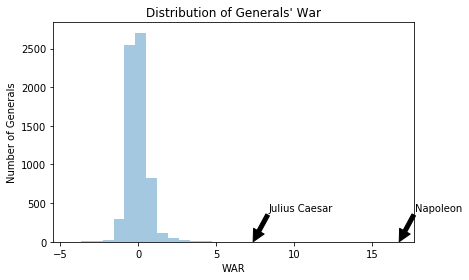

In [81]:
sns.distplot(df_totalwar['WAR'], kde = False, bins = 30)
plt.title("Distribution of Generals' War")
plt.ylabel('Number of Generals')
plt.annotate('Napoleon', xy = (16.713, 1), xytext = (17.713, 400), arrowprops = dict(facecolor = 'black'))
plt.annotate('Julius Caesar', xy = (7.364545, 1), xytext = (8.364545, 400), arrowprops = dict(facecolor = 'black'))
plt.tight_layout()
plt.savefig('/home/ethanarsht/Downloads/distplot.png')

In [ ]:
def index():
    output_file('docs/index.html')
    source = ColumnDataSource(data = dict(battles = df_totalwar.Battles,
                                          war = df_totalwar.WAR,
                                          general = df_totalwar.General))

    hover = HoverTool(tooltips = [('General', '@general'),
                                  ('Battles', '@battles'),
                                  ('WAR', '@war'),
                                      ])
    p = figure(title = "Click a circle for a profile of that general's career WAR",
               plot_height = 600, 
               plot_width = 800,

               tools = [hover, "tap", 'box_zoom', ResetTool()])
    p.circle(x = 'war', y = 'battles', size = 10, source = source)
    p.xaxis.axis_label = 'WAR'
    p.yaxis.axis_label = 'Battles'

    link = "{}.html".format('@general')

    if link == 'https://ethanarsht.github.io/military_rankings/Thomas de Courtenay, 5th/13th Earl of Devon':
            link = 'https://ethanarsht.github.io/military_rankings/Thomas de Courtenay'
    url = link
    taptool = p.select(type=TapTool)
    taptool.callback = OpenURL(url=url)
    save(p)

In [ ]:
index()

In [78]:
def bokeh(commander):
    global df_battles
    
    df_battles = pd.DataFrame()
    commander_war(commander)
    
#     df_battles = df_battles[df_battles.General == commander]
    df_battles.Year = df_battles.Year.fillna(-5000)
    df_battles.Year = df_battles.Year.astype(float, errors = 'ignore')
    df_battles = df_battles.sort_values('Year')
    wl = pd.DataFrame(df_battles.Outcome.value_counts())
    
    if 'V' in wl.index:
        wins = wl.loc['V', 'Outcome']
    else:
        wins = 0
    if 'D' in wl.index:
        losses = wl.loc['D', 'Outcome']
    else:
        losses = 0
    if 'I' in wl.index:
        draws = wl.loc['I', 'Outcome']
    else:
        draws = 0
    df_battles = df_battles.reset_index(drop = True)
    for i, row in df_battles.iterrows():
        df_battles.ix[i, 'cumulative'] = sum(df_battles.Value[0:i+1])
    
    
    source = ColumnDataSource(data = dict(battle = df_battles.Battle,
                              general = df_battles.General,
                              outcome = df_battles.Outcome,
                              value = df_battles.Value,
                              year = df_battles.Year,
                              cumulative = df_battles.cumulative))
    if all(x != -5000 for x in df_battles.Year):
        hover = HoverTool(tooltips = [('Battle', '@battle'),
                                  ('Outcome', '@outcome'),
                                  ('WAR', '@value'),
                                  ('Cumulative WAR', '@cumulative'),
                                  ('Year', '@year')])
    else:
        hover = HoverTool(tooltips = [('Battle', '@battle'),
                                  ('Outcome', '@outcome'),
                                  ('WAR', '@value'),
                                  ('Cumulative WAR', '@cumulative')
                                  ])
    
    x = list(df_battles.Battle)
    y = list(df_battles.Value)
    y_cum = list(df_battles.cumulative)
    
    if commander == 'Thomas de Courtenay, 5th/13th Earl of Devon':
        commander = 'Thomas de Courtenay'
    
    output_file('docs/{}.html'.format(commander))
    
    p = figure(title = commander + ' ({} - {} - {})'.format(wins, draws, losses), 
               plot_width=800, 
               plot_height=600, 
               x_range = x, 
               tools = [hover, 'tap']
               )
    p.xaxis.axis_label = "Click on a bar for more info on the battle it represents"
    p.yaxis.axis_label = "Cumulative WAR"
    
    url = 'https://en.wikipedia.org/wiki/{}'.format('@battle')
    taptool = p.select(type=TapTool)
    taptool.callback = OpenURL(url=url)

    p.line(x = 'battle', y = 'cumulative', source = source, line_width = 5)
#     g1_r = p.add_glyph(source_or_glyph = source, glyph = g_2)
#     g1_tap = TapTool(renderers = [g1_r],
#                     callback = OpenURL(url=url))
#     p.add_tools(g1_tap)
    
    color_mapper = CategoricalColorMapper(factors=['V', 'D', 'I'], palette=['Blue', 'Red', 'Yellow'])
    p.vbar(x = 'battle', 
           top = 'value', 
           width = 0.9, 
           color={'field': 'outcome', 'transform': color_mapper},
           alpha = 0.5,
           source = source)
    
#     url_2 = 'en.wikipedia.org/wiki/@battle'
#     g2_r = p.add_glyph(source_or_glyph = source, glyph = g_2)
#     g2_tap = TapTool(renderers = [g2_r],
#                      callback = OpenURL(url=url_2))
#     p.add_tools(g2_tap)
    
    
    p.xaxis.major_label_orientation = math.pi/2
    

#     show(p)
    save(p)

In [ ]:
count = 0
for general in df_run.belligerent.unique()[1:]:
    battle_list = []
    count += 1
    print(str(count) + '/' + str(len(df_run.belligerent.unique())))
    print(general)
    bokeh(general)

1/6620
David Ben-Gurion
0.976471504927


/home/ethanarsht/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


2/6620
Yisrael Galili
0.466697501186
3/6620
Yaakov Dori
0.466697501186
4/6620
Yigael Yadin
0.466697501186
5/6620
Mickey Marcus
0.466697501186
6/6620
Yigal Allon
0.466697501186
7/6620
Yitzhak Rabin
1.0317652423
8/6620
David Shaltiel
0.466697501186
9/6620
Moshe Dayan
2.09708607981
10/6620
Shimon Avidan
0.466697501186
11/6620
Moshe Carmel
0.466697501186
12/6620
Yitzhak Sadeh
0.466697501186
13/6620
Abdul Rahman Hassan Azzam
-0.464374724019
14/6620
Farouk of Egypt
-0.464374724019
15/6620
Abdullah I of Jordan
-0.464374724019
16/6620
Muzahim al-Pachachi
-0.464374724019
17/6620
Husni al-Za'im
-0.464374724019
18/6620
Amin al-Husseini
-0.464374724019
19/6620
Ahmed Ali al-Mwawi
-0.464374724019
20/6620
Mohammed Naguib
-0.464374724019
21/6620
John Bagot Glubb
-0.464374724019
22/6620
Habis al-Majali
-0.464374724019
23/6620
Hasan Salama
-0.464374724019
24/6620
Arab Liberation Army
-0.464374724019
25/6620
Fawzi al-Qawuqji
-0.464374724019
26/6620
Menachem Begin
-0.0668211389422
27/6620
Ariel Sharon
2.1

213/6620
Asakura Yoshikage
-1.36901350668
214/6620
Timur
0.475843212782
215/6620
Shahrukh Mirza
0.475843212782
216/6620
Khalil Sultan
0.475843212782
217/6620
Miran Shah
0.475843212782
218/6620
Abu Bakr (Timurid)
0.475843212782
219/6620
Sultan Huseyn
0.475843212782
220/6620
Pir Muhammad ibn Jahangir
0.475843212782
221/6620
Taj al-Din Shah-i Shahan Abu'l Fath
0.475843212782
222/6620
Bayezid I
-0.0132332338126
223/6620
Süleyman Çelebi
-0.473515332634
224/6620
Mehmed I
-0.473515332634
225/6620
Stefan Lazarević
0.0093628799067
226/6620
Gannys
0.5
227/6620
Heraclius
-0.675561800645
228/6620
Shahrbaraz
0.425106073641
229/6620
Shahin Vahmanzadegan
0.5
230/6620
Eslamu
-0.581789644599
231/6620
Fatagar
-0.581789644599
232/6620
Theophilos (emperor)
-0.51235325206
233/6620
Theophobos
-0.51235325206
234/6620
Manuel the Armenian
-0.51235325206
235/6620
Khaydhar ibn Kawus al-Afshin
0.514685411299
236/6620
Umar al-Aqta
0.514685411299
237/6620
Jaysh ibn Samsama
0.5
238/6620
Damian Dalassenos
-0.5
239/66

0.445559129486
420/6620
List of Marshals of France
0.445559129486
421/6620
Thomas of Lancaster, 1st Duke of Clarence
-0.443254116529
422/6620
Thomas Beaufort, Duke of Exeter
-0.443254116529
423/6620
John Beaufort, 1st Duke of Somerset
-0.443254116529
424/6620
Zhang Fei
1.05280629814
425/6620
Zhang He
-0.0227512644604
426/6620
Baldwin IV of Jerusalem
0.0493866009899
427/6620
Baldwin of Ibelin
0
428/6620
Balian of Ibelin
-0.96928814934
429/6620
Hugh II of Saint Omer
0
430/6620
Gökböri
0.889375724231
431/6620
Charles I of Naples
0.5
432/6620
Manfred, King of Sicily
-0.5
433/6620
Quintus Fulvius Flaccus (consul 237 BC)
-0.0463338901092
434/6620
Hanno the Elder
-0.979641057984
435/6620
Tiberius Sempronius Gracchus (consul 215 BC)
0.501739712627
436/6620
Manius Curius Dentatus
0.5
437/6620
John II Komnenos
0.5
438/6620
Telerig of Bulgaria
-0.422826178123
439/6620
Seron (Syrian governor)
-0.560736088276
440/6620
Judas Maccabeus
2.3227287845
441/6620
Cestius Gallus
-0.5
442/6620
Simon bar Gior

617/6620
Gaius Cassius Longinus
-1.46441907382
618/6620
Surena
0.490608712926
619/6620
Hasan ibn al-Nu'man
0.5
620/6620
Tiberios III
-0.5
621/6620
Hasdrubal the Boetharch
-0.5
622/6620
Scipio Aemilianus
1.0
623/6620
Manius Manilius
0.5
624/6620
Alberico da Barbiano
0.5
625/6620
Muzio Sforza
-0.0253308086017
626/6620
Galeotto I Malatesta
0.462360511195
627/6620
John Hawkwood
0.0646683743059
628/6620
Hanneken von Baumgarten
-0.460040699299
629/6620
Azzo VII d'Este
0.5
630/6620
Ezzelino III da Romano
-0.5
631/6620
Nicolaas Zannekin
-0.498833067244
632/6620
Philip VI of France
0.501166932756
633/6620
Giovanni Ordelaffi
-0.522380383274
634/6620
Da Polenta family
-0.522380383274
635/6620
Giovanni dell'Ischia
-0.522380383274
636/6620
Francesco Novello da Carrara
0.524709073605
637/6620
Jean Bureau
0.498025307448
638/6620
John Talbot, 1st Earl of Shrewsbury
-1.55013240459
639/6620
Leptines of Syracuse
0.544612756564
640/6620
Mieszko I of Poland
0.486359742501
641/6620
Czcibor
0.486359742501
64

1.55690419372
825/6620
Taira no Munemori
-1.02751902524
826/6620
Taira no Tomomori
-0.0275190252414
827/6620
Perozes
-0.53334152834
828/6620
Pityaxes
-0.53334152834
829/6620
Baresmanas
-0.53334152834
830/6620
Pharas the Herulian
0.535664280387
831/6620
Taddeo d'Este
-0.5
832/6620
Niccolò Piccinino
1.0
833/6620
William the Silent
-1.05258023283
834/6620
Thomas Morgan (died 1595)
0.992967998127
835/6620
Francisco de Valdez
-0.992890865659
836/6620
Julian Romero
0.0242661382002
837/6620
Pagondas
0.493192429112
838/6620
Hippocrates of Athens
-0.490859157227
839/6620
Alexios Doukas Philanthropenos
0.476609149434
840/6620
John Palaiologos (brother of Michael VIII)
-0.621865952393
841/6620
Fillippo Sanudo
-0.474280912738
842/6620
Guglielmo II da Verona
-0.474280912738
843/6620
Publius Cornelius Scipio
-0.498610337632
844/6620
Chen Tai
0.445559129486
845/6620
Deng Ai
0.445559129486
846/6620
Hu Fen
0.445559129486
847/6620
Jiang Wei
-0.407589836142
848/6620
Xiahou Ba
-0.443254116529
849/6620
Zha

1.12656957525
1018/6620
Jean Poton de Xaintrailles
1.12656957525
1019/6620
Marcus Minucius Rufus
-0.464335719613
1020/6620
Magister equitum
-0.464335719613
1021/6620
Archibald Campbell, 7th Earl of Argyll
-0.567533859772
1022/6620
George Gordon, 1st Marquess of Huntly
0.569823691781
1023/6620
Francis Hay, 9th Earl of Erroll
0.569823691781
1024/6620
Máel Sechnaill mac Domnaill
0.5
1025/6620
Sorley Boy MacDonnell
-0.5
1026/6620
Joseph Kabila
0.445559129486
1027/6620
Babacar Gaye
0.445559129486
1028/6620
Ignace Murwanashyaka
0.445559129486
1029/6620
José Eduardo dos Santos
0.445559129486
1030/6620
Robert Mugabe
0.445559129486
1031/6620
Laurent Nkunda
-0.443254116529
1032/6620
Lamoral, Count of Egmont
0.938506645153
1033/6620
Paul de Thermes
-0.48239332392
1034/6620
Gaius Claudius Nero
0.970034288673
1035/6620
Ulrich von Jungingen
-0.524307505666
1036/6620
Władysław II Jagiełło
1.0485230608
1037/6620
Vytautas
0.0698120251615
1038/6620
Roderic
-0.512967526138
1039/6620
Tariq ibn Ziyad
0.515

1212/6620
Gan Ning
0.552806298136
1213/6620
Lei Xu
0.552806298136
1214/6620
Yuan Shao
0.987526675257
1215/6620
Qu Yi
0.486359742501
1216/6620
Tian Feng
0.486359742501
1217/6620
Gongsun Zan
-0.982860990789
1218/6620
Yan Gang
-0.484027923544
1219/6620
Ma Su
-0.464335719613
1220/6620
Wang Ping (Three Kingdoms)
0.0356642803872
1221/6620
Zhang Han (Qin dynasty)
-0.557529072875
1222/6620
Sima Xin
-0.557529072875
1223/6620
Dong Yi (Qin dynasty)
-0.557529072875
1224/6620
Ying Bu
0.559830793095
1225/6620
Zhongli Mo
0.559830793095
1226/6620
Zheng Ji (general)
-0.5
1227/6620
Muwatalli II
-0.529076711743
1228/6620
Ḫattušili III
-0.529076711743
1229/6620
Mitanni
-0.529076711743
1230/6620
Ramesses II
1.03140204068
1231/6620
Paser (vizier)
0.531402040676
1232/6620
Amun-her-khepeshef
0.531402040676
1233/6620
Ramesses (prince)
0.531402040676
1234/6620
Khaemweset
0.531402040676
1235/6620
Pareherwenemef
0.531402040676
1236/6620
Nikephoros Bryennios the Elder
-1.06038163066
1237/6620
Mstislav Mstislavich


1407/6620
Henry III of England
-1.12815632648
1408/6620
Richard, 1st Earl of Cornwall
-0.53334152834
1409/6620
Nicholas de Segrave, 1st Baron Segrave
0.535664280387
1410/6620
Swedish jarls
-0.5
1411/6620
Charles the Deaf
-0.5
1412/6620
Juan Adolf van Haamstede
-0.5
1413/6620
Lodewijk van Boisot
1.01252588805
1414/6620
Ulrich II von Rosenberg
0.486241346826
1415/6620
Prokop the Great
0.0258956206021
1416/6620
Jan Čapek ze Sán
-0.483909560726
1417/6620
Prokop the Lesser
-0.483909560726
1418/6620
Jan Roháč z Dubé
0.0258956206021
1419/6620
Ahmed Khan bin Küchük
-0.5
1420/6620
James Douglas, 9th Earl of Douglas
-0.5
1421/6620
Alexander Stewart, Duke of Albany
-0.5
1422/6620
Simeon Bekbulatovich
-0.586060732082
1423/6620
Clas Åkesson Tott
0.588323624593
1424/6620
Robert Welles, 8th Baron Willoughby de Eresby
-0.5
1425/6620
Zhao Ponu
0.5
1426/6620
Henry VI of England
-0.454527326896
1427/6620
Humphrey Stafford, 1st Duke of Buckingham
-0.454527326896
1428/6620
Richard of York, 3rd Duke of York

1603/6620
Constantius II
0.473908014793
1604/6620
Magnentius
-0.471581084257
1605/6620
Andrew Mackay (British Army officer)
0.5
1606/6620
Mahayadin Ghori
0.5
1607/6620
Shurahbil ibn Amr
0.445559129486
1608/6620
Zayd ibn Harithah
-0.443254116529
1609/6620
Ja'far ibn Abi Talib
-0.443254116529
1610/6620
'Abd Allah ibn Rawahah
-0.443254116529
1611/6620
King Zhou of Shang
-0.510350924269
1612/6620
King Wu of Zhou
0.512683551455
1613/6620
Artayntes
-0.555233787057
1614/6620
Mardontes
-0.555233787057
1615/6620
Tigranes (general)
-0.555233787057
1616/6620
Leotychidas
0.557537971545
1617/6620
Perilaus (general)
0.557537971545
1618/6620
Kurushima Michifusa
-0.614245706756
1619/6620
Mōri Takamasa
-0.614245706756
1620/6620
Kan Michinaga
-0.614245706756
1621/6620
Kim Eok-chu
0.0935824821263
1622/6620
Kim Ung-ham
0.616455356348
1623/6620
Ahn Wi
0.616455356348
1624/6620
Song Yeo-jong
0.616455356348
1625/6620
Gaius Duilius
0.517796163965
1626/6620
Lucius Aemilius Regillus
0.506975632028
1627/6620
Poly

-0.529291851433
1806/6620
Jean de Clermont
-0.529291851433
1807/6620
Philip, Duke of Orléans
-0.529291851433
1808/6620
William Douglas, 1st Earl of Douglas
-0.529291851433
1809/6620
Edward, the Black Prince
0.531617058501
1810/6620
Thomas de Beauchamp, 11th Earl of Warwick
0.531617058501
1811/6620
William de Montagu, 2nd Earl of Salisbury
0.531617058501
1812/6620
Ippolito d'Este
0.5
1813/6620
Alfonso I d'Este, Duke of Ferrara
0.982565843786
1814/6620
Angelo Trevisan
-0.5
1815/6620
Olivier de Clisson
0.995422517465
1816/6620
Robert Knolles
-0.498833067244
1817/6620
Alfonso V of Aragon
-0.574227322506
1818/6620
John II of Aragon and Navarre
-0.574227322506
1819/6620
Henry, Duke of Villena
-0.574227322506
1820/6620
Filippo Maria Visconti
1.07173449607
1821/6620
Biagio Assereto
0.576508159544
1822/6620
Andrea Doria
-2.10690381976
1823/6620
Gabriel de Luetz
0.439928922752
1824/6620
Giovanni da Barbiano
-0.545828643361
1825/6620
Astorre I Manfredi
0.548141899649
1826/6620
Charles I of Hungar

1998/6620
Lembitu
-1.09158789958
1999/6620
Caupo of Turaida
1.09384151688
2000/6620
Bernard II, Lord of Lippe
0.593841516879
2001/6620
Emmanuel Philibert, Duke of Savoy
0.453781979173
2002/6620
Louis Gonzaga, Duke of Nevers
-0.451469065736
2003/6620
Al-Husayn ibn Rabah
-0.425663532586
2004/6620
Preljub
0.5
2005/6620
Kálfr Árnason
0.462728697834
2006/6620
Thorir Hund
0.462728697834
2007/6620
Hárek of Tjøtta
0.462728697834
2008/6620
Olaf II of Norway
-0.460408620576
2009/6620
Dag Ringsson
-0.460408620576
2010/6620
Hugh de Cressingham
-0.526737988015
2011/6620
Andrew Moray
0.529064586
2012/6620
George Talbot, 4th Earl of Shrewsbury
0.480442110075
2013/6620
George Stanley, 9th Baron Strange
0.480442110075
2014/6620
Edward Woodville, Lord Scales
0.480442110075
2015/6620
Thomas FitzGerald of Laccagh
-0.478112253561
2016/6620
Martin Schwartz (mercenary)
-0.478112253561
2017/6620
Lambert Simnel
-0.478112253561
2018/6620
Edward Plantagenet, 17th Earl of Warwick
-0.478112253561
2019/6620
Chnodom

2195/6620
David I of Scotland
-0.522742141857
2196/6620
William le Gros, 1st Earl of Albemarle
0.525070671971
2197/6620
Sviatopolk II of Kiev
-0.5
2198/6620
Vladimir II Monomakh
-0.5
2199/6620
Rostislav Vsevolodovich
-0.5
2200/6620
Vishvamitra
-0.5
2201/6620
Sudas
0.5
2202/6620
Vashistha
0.5
2203/6620
Arminius
-0.00376985292093
2204/6620
Publius Quinctilius Varus
-0.493896509081
2205/6620
Suicide
-0.493896509081
2206/6620
Jean de Beaumanoir
0.501166932756
2207/6620
Robert Bemborough
-0.498833067244
2208/6620
Tiberius Sempronius Longus (consul 218 BC)
-0.501261493198
2209/6620
Abu Sufyan ibn Harb
-0.639282018368
2210/6620
Uthman
0.556745883471
2211/6620
Salman the Persian
0.556745883471
2212/6620
Arnegisclus
-0.5
2213/6620
Attila
0.5
2214/6620
Edigu
0.459140672738
2215/6620
Temür Qutlugh
0.459140672738
2216/6620
Tokhtamysh
-0.456823289203
2217/6620
Germanicus
0.5
2218/6620
Flavus (son of Segimerus)
0.5
2219/6620
Chariovalda
0.5
2220/6620
Inguiomer
-0.5
2221/6620
Richomeres
0
2222/6620
P

2391/6620
Adolf of Germany
-0.472036410484
2392/6620
Dietrich Luf II
-0.472036410484
2393/6620
Sima Yi
-0.0333415283404
2394/6620
Guo Huai
-0.53334152834
2395/6620
Fei Yi
0.535664280387
2396/6620
Wei Yan
0.0356642803872
2397/6620
Yang Yi
0.0356642803872
2398/6620
Huang Zu
-0.0723740421995
2399/6620
Ling Cao
0.0746574533293
2400/6620
Aju
0.413723907342
2401/6620
Arikhgiya
0.413723907342
2402/6620
Shi Tianze
0.413723907342
2403/6620
Lü Wenhuan
-0.411461365578
2404/6620
Li Tingzhi
-0.411461365578
2405/6620
Shamoke
-0.487316448545
2406/6620
Cao Shuang
-0.5
2407/6620
Xu Rong (general)
0.501166932756
2408/6620
Oda Nobutaka
0.460263498664
2409/6620
Nakamura Kazuuji
0.460263498664
2410/6620
Horio Yoshiharu
0.460263498664
2411/6620
Katō Mitsuyasu
0.460263498664
2412/6620
Kimura Shigeori
0.460263498664
2413/6620
Takayama Shigetama
0.460263498664
2414/6620
Nakagawa Kiyohide
0.460263498664
2415/6620
Mikoda Masaharu
0.460263498664
2416/6620
Toyotomi Hidenaga
0.460263498664
2417/6620
Kuroda Yoshitak

-1.55731414482
2588/6620
Jean-de-Dieu Soult
-3.41814601869
2589/6620
Jean-Baptiste Girard (soldier)
-0.454951824425
2590/6620
Jean-Baptiste Jourdan
1.43187610955
2591/6620
François Sébastien Charles Joseph de Croix, Count of Clerfayt
-2.38005703224
2592/6620
Hugh Judson Kilpatrick
0.477392116456
2593/6620
Thomas T. Munford
0.935976500112
2594/6620
George Gordon, 2nd Marquess of Huntly
0.509378644268
2595/6620
Manus O'Cahan's Regiment
1.06126133927
2596/6620
William Baillie (soldier)
-1.08722345072
2597/6620
Alexander Lindsay, 1st Earl of Balcarres
-0.507045408319
2598/6620
Sardar
-0.0744275068262
2599/6620
Ranjodh Singh Majithia
-1.04656513515
2600/6620
Sir Harry Smith, 1st Baronet
0.986036728633
2601/6620
Prince Frederick, Duke of York and Albany
-0.512400662492
2602/6620
Ivan Essen
0.477257858143
2603/6620
Guillaume Brune
0.52845793307
2604/6620
Herman Willem Daendels
-0.447821889087
2605/6620
Samuel Gibbs French
-0.522115652739
2606/6620
John M. Corse
0.525610871707
2607/6620
Jacque

0.489350875794
2765/6620
Arthur Herbert, 1st Earl of Torrington
-0.960170839269
2766/6620
Manuel Lapeña
-0.0215001368887
2767/6620
Thomas Graham, 1st Baron Lynedoch
0.955643989459
2768/6620
Claude Victor-Perrin, Duc de Belluno
-1.45751449883
2769/6620
Jacques MacDonald
-1.52425107529
2770/6620
Khem Karan Singh
0.9714660357
2771/6620
Arun Shridhar Vaidya
0.501166932756
2772/6620
Abdul Ali Malik
-0.966807197204
2773/6620
Dagobert Sigmund von Wurmser
-0.95818457369
2774/6620
Jonathan M. Wainwright (general)
-1.44861605537
2775/6620
George M. Parker (general)
-0.522742141857
2776/6620
Edward P. King
-0.522742141857
2777/6620
Vicente Lim
-1.02228591381
2778/6620
Masaharu Homma
1.4555632048
2779/6620
Susumu Morioka
0.525070671971
2780/6620
Kineo Kitajima
0.525070671971
2781/6620
Kameichiro Nagano
0.525070671971
2782/6620
Nikolay Kamensky
0.996659417456
2783/6620
Frederick Dobson Middleton
-0.00359928968145
2784/6620
Bowen van Straubenzee
0.44220945185
2785/6620
Gabriel Dumont (Métis leader)


0.51059026388
2949/6620
Jacques François Dugommier
1.49808224175
2950/6620
Luis Firmín de Carvajal, Conde de la Unión
-1.0114537819
2951/6620
John Forbes (Portuguese general)
-1.0114537819
2952/6620
Winfield Scott Hancock
-0.543079533104
2953/6620
Henry Heth
0.0143864906008
2954/6620
William Howe, 5th Viscount Howe
2.80714744788
2955/6620
Wilhelm von Knyphausen
0.448863261519
2956/6620
George Washington
-0.0693958639212
2957/6620
Nathanael Greene
-1.00044948016
2958/6620
John Sullivan (general)
-1.0137496095
2959/6620
William Alexander, Lord Stirling
-1.4692684312
2960/6620
Adam Stephen
-0.495733280341
2961/6620
Anthony Wayne
0.472092124074
2962/6620
Casimir Pulaski
-1.11320540125
2963/6620
Moses Hazen
-0.540493200771
2964/6620
Radomir Putnik
1.96054565367
2965/6620
Petar Bojović
0.932473874906
2966/6620
Alexander I of Yugoslavia
0.94665768084
2967/6620
Živojin Mišić
0.987962605533
2968/6620
Janko Vukotić
0.480697708796
2969/6620
Mihail Savov
-0.978367754015
2970/6620
Stiliyan Kovachev

3124/6620
Michel-Ange Duquesne de Menneville
-0.404314844436
3125/6620
Edward Vernon
-0.579294298617
3126/6620
Thomas Wentworth (British Army officer)
-0.579294298617
3127/6620
Blas de Lezo
0.581567771291
3128/6620
Sebastián de Eslava
0.581567771291
3129/6620
Campuzano Polanco family
0.581567771291
3130/6620
Carlos Desnaux
0.581567771291
3131/6620
Claiborne Fox Jackson
0.442470927125
3132/6620
Franz Sigel
-1.42028426727
3133/6620
Philippe I, Duke of Orléans
0.498025307448
3134/6620
Louis de Crevant, Duke of Humières
0.498025307448
3135/6620
François-Henri de Montmorency, duc de Luxembourg
2.4818773972
3136/6620
William III of England
-0.510288011627
3137/6620
Dimo Hamaambo
-0.508946650993
3138/6620
Ian Gleeson
0.511279561715
3139/6620
Charles Emmanuel III of Sardinia
-0.60671481803
3140/6620
Ballì de Givry
0.602835931124
3141/6620
Louis François, Prince of Conti
1.54338548734
3142/6620
Enrico Cialdini
0.940097913284
3143/6620
Manfredo Fanti
0.440097913284
3144/6620
Christophe Léon Loui

Anne Antoine, Comte d'Aché
0.00116693275583
3311/6620
Edward Hughes (Royal Navy officer)
-1.50341296969
3312/6620
Pierre André de Suffren
1.98841122024
3313/6620
Prince William, Duke of Cumberland
-0.955398496036
3314/6620
Charles Edward Stuart
0.499180644445
3315/6620
Thomas L. Rosser
0.0171375575491
3316/6620
Andrew A. Humphreys
-0.0247943672638
3317/6620
John Irvin Gregg
-0.498833067244
3318/6620
Bartolomé Mitre
-0.560736088276
3319/6620
Joaquim Marques Lisboa, Marquis of Tamandaré
-0.560736088276
3320/6620
José E. Díaz
0.563034200913
3321/6620
Joseph Radetzky von Radetz
0.950892873563
3322/6620
Eugen Wratislaw von Mitrowitz
0.480442110075
3323/6620
Charles Albert of Sardinia
-0.478112253561
3324/6620
Eusebio Bava
-0.478112253561
3325/6620
Archduke Albrecht, Duke of Teschen
0.493761969709
3326/6620
Alfonso Ferrero La Marmora
-0.491428616061
3327/6620
William Dillon Otter
-0.540215623735
3328/6620
Pitikwahanapiwiyin
0.542533508205
3329/6620
Fine-Day
0.542533508205
3330/6620
Oku Yasuk

3488/6620
William F. Lynch
-0.44614890886
3489/6620
Stephen Clegg Rowan
0.901382398185
3490/6620
Frederick Steele
1.86310902136
3491/6620
William B. Franklin
0.478414320446
3492/6620
Gustavus Woodson Smith
-0.503372117907
3493/6620
William H.C. Whiting
-0.488571392486
3494/6620
Sentarō Ōmori
-0.485785170544
3495/6620
Matsuji Ijuin
-0.482989167798
3496/6620
Yoshimi Nishida
-0.926047248814
3497/6620
Harry W. Hill
0.908364077026
3498/6620
John T. Walker (USMC)
0.5
3499/6620
Thomas E. Watson (USMC)
1.3599951295
3500/6620
Pedro Caro, 3rd Marquis of la Romana
-0.501136930808
3501/6620
Omar Pasha
0.951106269678
3502/6620
Antoni Aleksander Iliński
0.95707823772
3503/6620
Armand-Octave-Marie d’Allonville
0.491742772573
3504/6620
Stepan Khrulev
-0.48940973612
3505/6620
Alexander Stewart (British Army officer)
0.506103490919
3506/6620
Levin August von Bennigsen
0.486668629389
3507/6620
Anton Wilhelm von L'Estocq
-0.499519648345
3508/6620
Edward M. McCook
0.5
3509/6620
William T. Martin
-0.9545273

0.51059026388
3669/6620
Gustaf Wattrang
-0.381700542034
3670/6620
Nils Ehrenskiöld
-0.381700542034
3671/6620
Fyodor Apraksin
0.383906183831
3672/6620
Matija Zmajević
0.383906183831
3673/6620
Javad Khan
-0.5
3674/6620
Pavel Tsitsianov
0.5
3675/6620
Flight lieutenant
-0.5
3676/6620
Pervaiz Mehdi Qureshi
-0.5
3677/6620
William Farrar Smith
0
3678/6620
Robert Toombs
0
3679/6620
George T. Anderson
0
3680/6620
Claude Auchinleck
-0.0627154796629
3681/6620
Neil Ritchie
-0.515757838655
3682/6620
Ettore Bastico
0.051680246219
3683/6620
Trunajaya
0.0
3684/6620
Karaeng Galesong
0.5
3685/6620
Amangkurat II of Mataram
-0.5
3686/6620
Pangeran Purbaya
-0.5
3687/6620
Pangeran Singasari
-0.5
3688/6620
Boris Sheremetev
-1.15227553487
3689/6620
Adam Ludwig Lewenhaupt
0.108781102283
3690/6620
William Smallwood
-0.509199431246
3691/6620
Hasan Tahsin Pasha
-0.489913158993
3692/6620
Jacob van Heemskerk
0.5
3693/6620
Joseph Alfred Micheler
0.5
3694/6620
Max von Gallwitz
-4.35021879957
3695/6620
Frederic Thesig

3859/6620
John K. Lawson
-0.365522140525
3860/6620
Voldemar Oinonen
-0.5
3861/6620
Francisco de Melo
-0.0426668434914
3862/6620
Antoine III de Gramont
-0.459606266272
3863/6620
Andrew Jackson
1.90770900506
3864/6620
Menawa
-0.452895812405
3865/6620
Joseph Lane
0.993807831083
3866/6620
Juan José Castelli
-0.53863055539
3867/6620
Antonio González de Balcarce
-0.53863055539
3868/6620
José Manuel de Goyeneche, 1st Count of Guaqui
0.540949640434
3869/6620
Wolmar Anton von Schlippenbach
-0.440039938927
3870/6620
Hayao Tada
0.0293875399153
3871/6620
Zhu De
-0.0460440576515
3872/6620
Omar Bradley
0.480442110075
3873/6620
Mir Sher Muhammad Talpur
-0.513640257499
3874/6620
Hoshu Sheedi
-0.513640257499
3875/6620
Sir James Outram, 1st Baronet
0.0768571856596
3876/6620
Charles James Napier
1.10224093203
3877/6620
Nguyễn Hữu An
0.00116693275583
3878/6620
Hal Moore
0.00116693275583
3879/6620
Robert McDade
0.00116693275583
3880/6620
Georg Andreas von Rosen
-0.0470744515948
3881/6620
Friedrich Caspar v

4043/6620
Radko Dimitriev
0.989135776248
4044/6620
Ivan Fichev
0.989135776248
4045/6620
Mahmud Muhtar Pasha
-0.476058160411
4046/6620
Joseph C. Porter
-0.543157140774
4047/6620
Arshak Ter-Gukasov
-0.503340582544
4048/6620
Ahmed Muhtar Pasha
-1.66673754197
4049/6620
Augustus II the Strong
-0.514457918055
4050/6620
Adam Heinrich von Steinau
-0.514457918055
4051/6620
Hieronim Augustyn Lubomirski
-0.514457918055
4052/6620
Frederick IV, Duke of Holstein-Gottorp
0.516789504765
4053/6620
Otto Vellingk
1.06969977388
4054/6620
Bernhard von Liewen
0.516789504765
4055/6620
Dmitry Shuisky
-0.568958824684
4056/6620
Jacob De la Gardie
-0.568958824684
4057/6620
Yakov Kulnev
-0.483847416035
4058/6620
Theobald Taaffe, 1st Earl of Carlingford
-0.514125475812
4059/6620
Murrough O'Brien, 1st Earl of Inchiquin
0.516457158453
4060/6620
Gustav Anton von Wietersheim
-0.524731377474
4061/6620
Franciszek Kleeberg
0.52705898296
4062/6620
Nikolay Tuchkov
-0.55980729232
4063/6620
Johan August Sandels
1.06210646948

4225/6620
Harold Bridgwood Walker
0.5
4226/6620
Sir William Erskine, 1st Baronet
0.46665847166
4227/6620
Charles Mawhood
0.0275435808635
4228/6620
Thomas Mifflin
-0.464335719613
4229/6620
Henry Knox
0.0154956320932
4230/6620
Harry Smith (Australian soldier)
0.5
4231/6620
Kuldip Singh Chandpuri
0.5
4232/6620
Guy Carleton, 1st Baron Dorchester
0.946562918972
4233/6620
Ethan Allen
0.0107004267669
4234/6620
James Lewis Basden
-0.518327887731
4235/6620
Andrew Holmes (army officer)
-0.0195574177894
4236/6620
Sam Steele
-0.464335719613
4237/6620
Konrad Krafft von Dellmensingen
0.5
4238/6620
Josias von Heeringen
1.02188774644
4239/6620
Augustin Dubail
-1.01955788993
4240/6620
Noël Édouard, vicomte de Curières de Castelnau
0.00593826436455
4241/6620
Alexander Imerentinsky
0.451671044331
4242/6620
Mikhail Skobelev
0.91972690474
4243/6620
Vladimir Dobrowolski
0.451671044331
4244/6620
Osman Nuri Pasha
-0.915092265457
4245/6620
Rifat Pasha
-0.449360038798
4246/6620
William Hicks Jackson
0.5
4247/66

4402/6620
Kurt Christoph Graf von Schwerin
0.494527928875
4403/6620
Charles Lee (general)
0.0153918408896
4404/6620
Gilbert du Motier, Marquis de Lafayette
0.479831351706
4405/6620
Lew Wallace
-0.456011370594
4406/6620
Alexander von Kluck
-0.0156202552322
4407/6620
Justo José de Urquiza
0.493685638554
4408/6620
Manuel Marques de Sousa, Count of Porto Alegre
0.493685638554
4409/6620
Juan Manuel de Rosas
-0.491352295513
4410/6620
Harold Alexander, 1st Earl Alexander of Tunis
0.968732832029
4411/6620
Oliver Leese
0.5
4412/6620
Heinrich von Vietinghoff
-0.5
4413/6620
Fridolin von Senger und Etterlin
-0.5
4414/6620
João Baptista Mascarenhas de Morais
0.5
4415/6620
Eccard Freiherr von Gablenz
-0.5
4416/6620
William Brown (admiral)
-0.5
4417/6620
Philipp von Stadion
-0.548282481928
4418/6620
Élie Frédéric Forey
0.550593530361
4419/6620
Amédée Emmanuel François Laharpe
0.480442110075
4420/6620
Antoine-Guillaume Rampon
0.480442110075
4421/6620
Eugène-Guillaume Argenteau
-0.478112253561
4422/662

Louis Ruquoy
0.519452530987
4588/6620
Henry Lee III
0.491742772573
4589/6620
William Sutherland (British Army officer)
-0.48940973612
4590/6620
Earl Van Dorn
-1.48644168112
4591/6620
William H. Rupertus
0.436497532377
4592/6620
Herman H. Hanneken
0.436497532377
4593/6620
Harold D. Harris
0.436497532377
4594/6620
Chesty Puller
0.436497532377
4595/6620
Kunio Nakagawa
-0.43420268565
4596/6620
John Glover (general)
0.57160615135
4597/6620
Francisco de Miranda
0.417687693796
4598/6620
José Solano y Bote
0.417687693796
4599/6620
John Campbell, of Strachur
-0.41541883479
4600/6620
John Gordon (militia captain)
0.425106073641
4601/6620
Mateo González Manrique
-0.422826178123
4602/6620
Konstantinos Sapountzakis
0.0653875238347
4603/6620
Don Carlos Buell
1.39327008151
4604/6620
Silahdar Damat Ali Pasha
-0.53294509122
4605/6620
Infante Manuel, Count of Ourém
0.535268097105
4606/6620
János Pállfy
0.535268097105
4607/6620
Charles Alexander, Duke of Württemberg
0.535268097105
4608/6620
Antti Pennane

0.949999084391
4765/6620
Jean Reynier
0.073358148267
4766/6620
Sir William Erskine, 2nd Baronet
0.504825868915
4767/6620
Graham N. Fitch
0.5
4768/6620
Augustus Kilty
0.5
4769/6620
Köprülüzade Fazıl Ahmed Pasha
-0.559240747317
4770/6620
Raimondo Montecuccoli
0.131749297751
4771/6620
Johann von Sporck
0.561540565923
4772/6620
Leopold Wilhelm, Margrave of Baden-Baden
0.561540565923
4773/6620
Jean de Coligny-Saligny
0.561540565923
4774/6620
Emanuel Hesse
-0.556348801473
4775/6620
Matchekewis
-0.556348801473
4776/6620
Wapasha I
-0.556348801473
4777/6620
Fernando de Leyba
0.558651801124
4778/6620
Wolfred Nelson
0.454171356639
4779/6620
Charles Stephen Gore
-0.451858100351
4780/6620
James Murray (British Army officer, born 1721)
0.0031772935688
4781/6620
John Colborne, 1st Baron Seaton
0.422799590375
4782/6620
Maximilien Globensky
0.422799590375
4783/6620
Jean-Olivier Chénier
-0.420523016444
4784/6620
Hunter Liggett
0.867160860104
4785/6620
Joseph T. Dickman
0.412989503466
4786/6620
George H.

0.568997056861
4950/6620
Henry Johnson (American Revolutionary War)
-0.464335719613
4951/6620
Carl Gustaf Armfeldt
-1.01877659013
4952/6620
William Forbes Gatacre
-0.5
4953/6620
Avraham Adan
0.592024894749
4954/6620
Yossi Yoffe
0.5
4955/6620
Nahum Zaken
0.5
4956/6620
John J. Peck
0.00957176890499
4957/6620
Harald Öhquist
0.5
4958/6620
Carl Gustaf Emil Mannerheim
0.0191032769072
4959/6620
Hector Waller
-0.397746197909
4960/6620
Albert H. Rooks
-0.397746197909
4961/6620
Kenzaburo Hara (admiral)
0.399984577858
4962/6620
Alexei Vinogradov
-0.563391734576
4963/6620
Hjalmar Siilasvuo
1.06568671477
4964/6620
Aubertin Walter Sothern Mallaby
0.480442110075
4965/6620
Robert Mansergh
0.480442110075
4966/6620
Sutomo
-0.478112253561
4967/6620
Cornelis Speelman
0.5
4968/6620
Sir Charles Green, 1st Baronet
0.5
4969/6620
Van Imbyze van Batenburg
-0.5
4970/6620
Cadmus M. Wilcox
-0.53334152834
4971/6620
Hendrik van Haus
-0.498833067244
4972/6620
João Fernandes Vieira
0.501166932756
4973/6620
Han Fuju
0.

5144/6620
Guy Simonds
0.521887746439
5145/6620
Bertram Ramsay
0.987367417797
5146/6620
Francisco de Moncada, 3rd Marquis of Aitona
-0.543280372676
5147/6620
John VIII, Count of Nassau-Siegen
-0.543280372676
5148/6620
Marinus Hollare
0.545595802943
5149/6620
Emir Abdelkader
-0.5
5150/6620
Henri d'Orléans, Duke of Aumale
0.5
5151/6620
Percy W. Nelles
0.406565235672
5152/6620
Leonard W. Murray
0.406565235672
5153/6620
Karl Dönitz
0.0956851555639
5154/6620
William Henry Harrison
1.85553784049
5155/6620
Jeffery Amherst, 1st Baron Amherst
0.809566653523
5156/6620
Patrick Edward Connor
1.02188774644
5157/6620
Jim Bridger
0.5
5158/6620
Frank North
0.5
5159/6620
Rapp Brush
0.49579134311
5160/6620
William Howard Arnold
0.49579134311
5161/6620
James M. Cushing
0.49579134311
5162/6620
Macario Peralta, Jr.
0.49579134311
5163/6620
Takeo Manjome
-0.493457747353
5164/6620
Remus von Woyrsch
-0.484027923544
5165/6620
Nils von Schoultz
-0.5
5166/6620
Henry Dundas, 3rd Viscount Melville
0.5
5167/6620
Wilg

5322/6620
Tamon Yamaguchi
0.426565906712
5323/6620
Winfield S. Cunningham
-0.424283960095
5324/6620
James Devereux
-0.424283960095
5325/6620
Paul A. Putnam
-0.424283960095
5326/6620
Henry T. Elrod
-0.424283960095
5327/6620
Jan Stanisław Sapieha
-0.53334152834
5328/6620
Thomas Arthur, comte de Lally
-0.520980754516
5329/6620
Louis Nicolas Victor de Félix d'Ollières
-0.535491167502
5330/6620
Carl Nieroth
0.51744189331
5331/6620
Otto Arnold von Paykull
-0.515110500911
5332/6620
Ivan Paskevich
0.974066977263
5333/6620
Karl Wilhelm von Toll
0.461383425807
5334/6620
Leon Trotsky
-0.500560965622
5335/6620
Hayk Bzhishkyan
-0.500560965622
5336/6620
Sergey Kamenev
-0.500560965622
5337/6620
Alexander Yegorov (military)
-0.500560965622
5338/6620
Tadeusz Jordan-Rozwadowski
0.502894803261
5339/6620
Bolesław Roja
0.502894803261
5340/6620
Leonard Skierski
0.502894803261
5341/6620
Georg von Küchler
-0.00250552221893
5342/6620
Werner von Fritsch
0.483489407276
5343/6620
Walerian Czuma
-0.481158458583
53

5511/6620
John Maxwell (British Army officer)
0.867314810691
5512/6620
William Lowe (British Army officer)
0.412601618327
5513/6620
Patrick Pearse
-0.410340918357
5514/6620
James Connolly
-0.410340918357
5515/6620
Tom Clarke (Irish republican)
-0.410340918357
5516/6620
Seán Mac Diarmada
-0.410340918357
5517/6620
Joseph Plunkett
-0.410340918357
5518/6620
Éamonn Ceannt
-0.410340918357
5519/6620
Thomas MacDonagh
-0.410340918357
5520/6620
Frederick Stanley Maude
0.916927047155
5521/6620
Halil Kut
0.0479366831523
5522/6620
Alexander Madiebo
-0.5
5523/6620
Walter Sinclair Delamain
0.5
5524/6620
Omar Hadid
0.476160255571
5525/6620
Abu Anas al-Shami
0.476160255571
5526/6620
Abdullah al-Janabi
0.0343245002813
5527/6620
Abu Ayyub al-Masri
0.534324500281
5528/6620
James T. Conway
-0.473832226509
5529/6620
James Mattis
-0.0296929500751
5530/6620
Marcus Junius Brutus the Younger
-0.976143185821
5531/6620
Aulus Allienus
-0.976143185821
5532/6620
Serapion (strategos)
-0.976143185821
5533/6620
Edmund 

0.424676950651
5701/6620
Manohar Lal Chibber
0.470299102944
5702/6620
Northern Command (India)
0.470299102944
5703/6620
Premindra Singh Bhagat
0.470299102944
5704/6620
Central Command (India)
0.470299102944
5705/6620
Sagat Singh
0.470299102944
5706/6620
IV Corps (India)
0.470299102944
5707/6620
Tapishwar Narain Raina
0.470299102944
5708/6620
II Corps (India)
0.470299102944
5709/6620
Sartaj Singh (general)
0.470299102944
5710/6620
XV Corps (India)
0.424676950651
5711/6620
I Corps (India)
0.424676950651
5712/6620
Depinder Singh
0.470299102944
5713/6620
XII Corps (India)
0.470299102944
5714/6620
J. F. R. Jacob
0.470299102944
5715/6620
Chief of staff
0.470299102944
5716/6620
Om Prakash Malhotra
0.470299102944
5717/6620
Sardarilal Mathradas Nanda
0.970299102944
5718/6620
Chief of the Naval Staff (India)
0.924676950651
5719/6620
Air chief marshal
0.838974121183
5720/6620
Pratap Chandra Lal
0.470299102944
5721/6620
Chief of the Air Staff (India)
0.424676950651
5722/6620
R. N. Kao
0.4702991029

In [ ]:
mka = df_run.loc[8965, 'belligerent']

In [ ]:
mka

In [ ]:
df_battles

In [ ]:
battle_list = []
bokeh(u'Ariel Sharon')

In [ ]:
df_warchart = pd.DataFrame({'Labels': ['Win = 1', 'Replacement-Level Performance = .51', 'WAR From Battle = .49'],
              'Values': [1, .51, .49]})

In [ ]:
df_warchart = df_warchart.sort_values('Values', ascending = True)

In [ ]:
df_warchart

In [ ]:
df_warchart = df_warchart.iloc[::-1]

In [ ]:
fig = plt.figure(figsize = (12,9))
plt.style.use('fivethirtyeight')
plt.bar(df_warchart.index, df_warchart.Values, width = 1, color = ['red', 'blue', 'yellow'])
plt.xticks(df_warchart.index + .5, df_warchart.Labels, rotation = 45)
plt.xticks()
plt.title("Bonaparte's WAR in Battle of Borodino")
plt.tight_layout()
plt.savefig('napoleon_war_sample')

# ax.set_axis_bgcolor('gray')

In [ ]:
df_warchart_two = pd.DataFrame({'Labels': ['Win = -1', 'Replacement-Level Performance = .49', 'WAR From Battle = -.51'],
              'Values': [-1, -.49, -.51]})

In [ ]:
fig = plt.figure(figsize = (12,9))
plt.style.use('fivethirtyeight')
plt.bar(df_warchart_two.index, df_warchart_two.Values, width = 1, color = ['red', 'blue', 'white'])
plt.xticks(df_warchart_two.index, df_warchart_two.Labels, rotation = 45)
plt.title("Kutuzov's WAR in Battle of Borodino")
plt.tight_layout()
plt.savefig('/home/ethanarsht/Downloads/kutuzov_war_sample')

# ax.set_axis_bgcolor('gray')